In [1]:
import pandas as pd
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from pylab import rcParams
from datetime import datetime
import matplotlib.ticker as plticker
import matplotlib.dates as mdates

from mpl_toolkits.axes_grid1 import make_axes_locatable

from sklearn.decomposition import PCA
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

plt.rcParams['figure.figsize'] =7.8 ,3.9
plt.rcParams['legend.fontsize'] = 11
plt.rcParams["figure.dpi"] = 300
font = {'family' : 'Times New Roman','weight' : "light", 'size'   : 11}
plt.rc('font', **font)

### All MMTs

In [2]:
datelist = pd.date_range(start="2017-03-02", end="2018-02-17").strftime("%Y-%m-%d").astype(str).to_list()
#datelist = pd.date_range(start="2018-01-20", end="2018-01-21").strftime("%Y-%m-%d").astype(str).to_list()

#datelist = ["2017-03-02"]

In [3]:
rmsi_all_p1 = pd.DataFrame()
shi_all_p1 = pd.DataFrame()
rmsi_all_p2 = pd.DataFrame()
shi_all_p2 = pd.DataFrame()
rmsi_all_p3 = pd.DataFrame()
shi_all_p3 = pd.DataFrame()

for date in datelist:
    rmsi_all_p1 = rmsi_all_p1.append(pd.read_pickle("E:\\resampled_phasevise\\rmsi\\" + date + "_rmsi_10min_mean_p1.p"))
    shi_all_p1 = shi_all_p1.append(pd.read_pickle("E:\\resampled_phasevise\\i\\" + date + "_harmonics10min_i_mean_p1.p"))
    
    rmsi_all_p2 = rmsi_all_p2.append(pd.read_pickle("E:\\resampled_phasevise\\rmsi\\" + date + "_rmsi_10min_mean_p2.p"))
    shi_all_p2 = shi_all_p2.append(pd.read_pickle("E:\\resampled_phasevise\\i\\" + date + "_harmonics10min_i_mean_p2.p"))
    
    rmsi_all_p3 = rmsi_all_p3.append(pd.read_pickle("E:\\resampled_phasevise\\rmsi\\" + date + "_rmsi_10min_mean_p3.p"))
    shi_all_p3 = shi_all_p3.append(pd.read_pickle("E:\\resampled_phasevise\\i\\" + date + "_harmonics10min_i_mean_p3.p"))

In [4]:
mask = rmsi_all_p1<2
shi_2A_p1 = shi_all_p1.loc[mask[0]]

mask2 = rmsi_all_p2<2
shi_2A_p2 = shi_all_p2.loc[mask2[0]]

mask3 = rmsi_all_p3<2
shi_2A_p3 = shi_all_p3.loc[mask3[0]]

In [5]:
shi_2A_p1.shape

(44245, 2960)

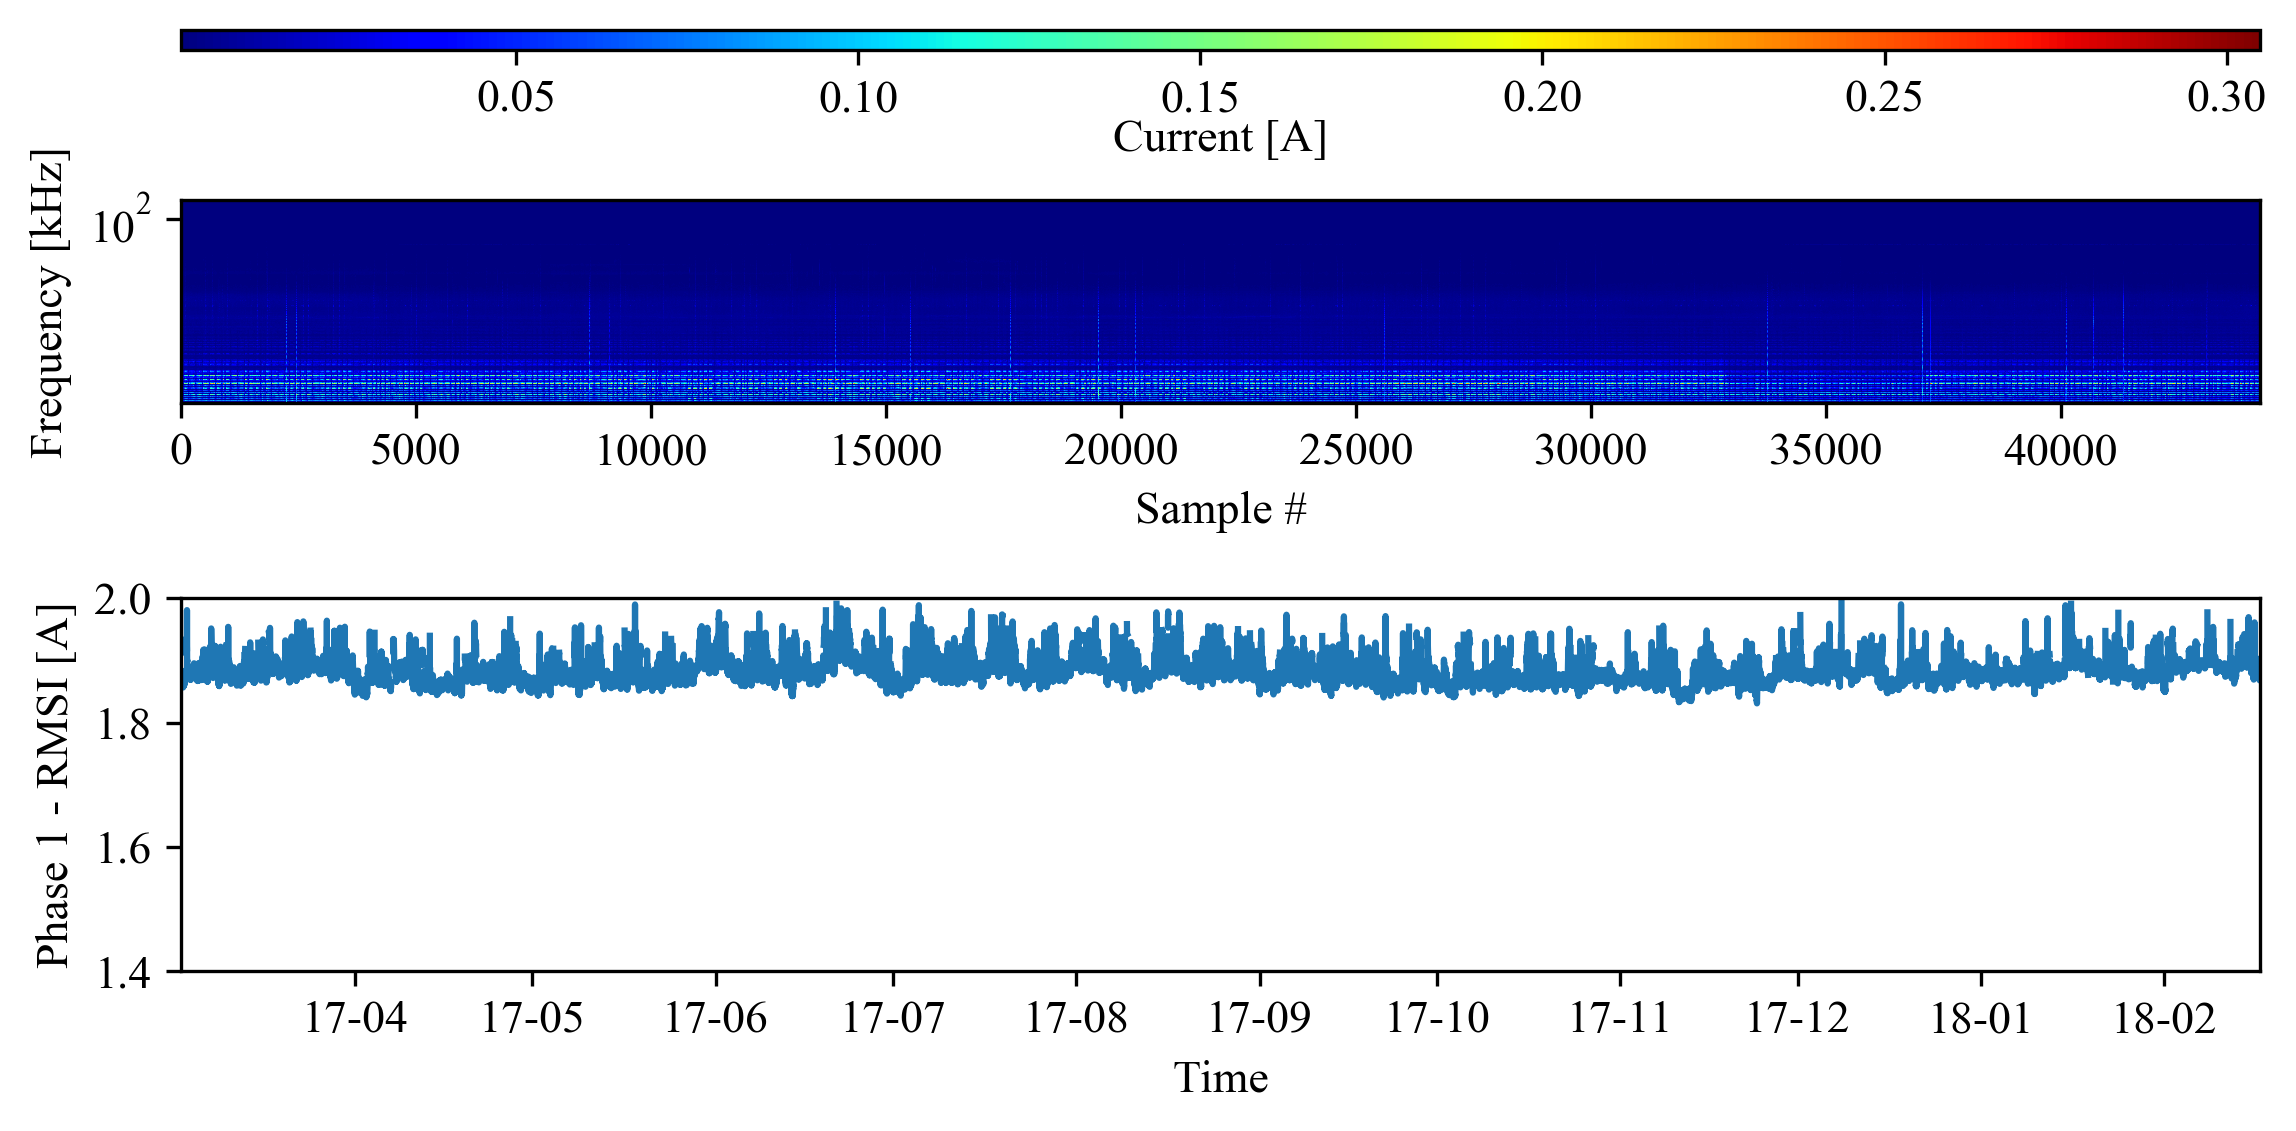

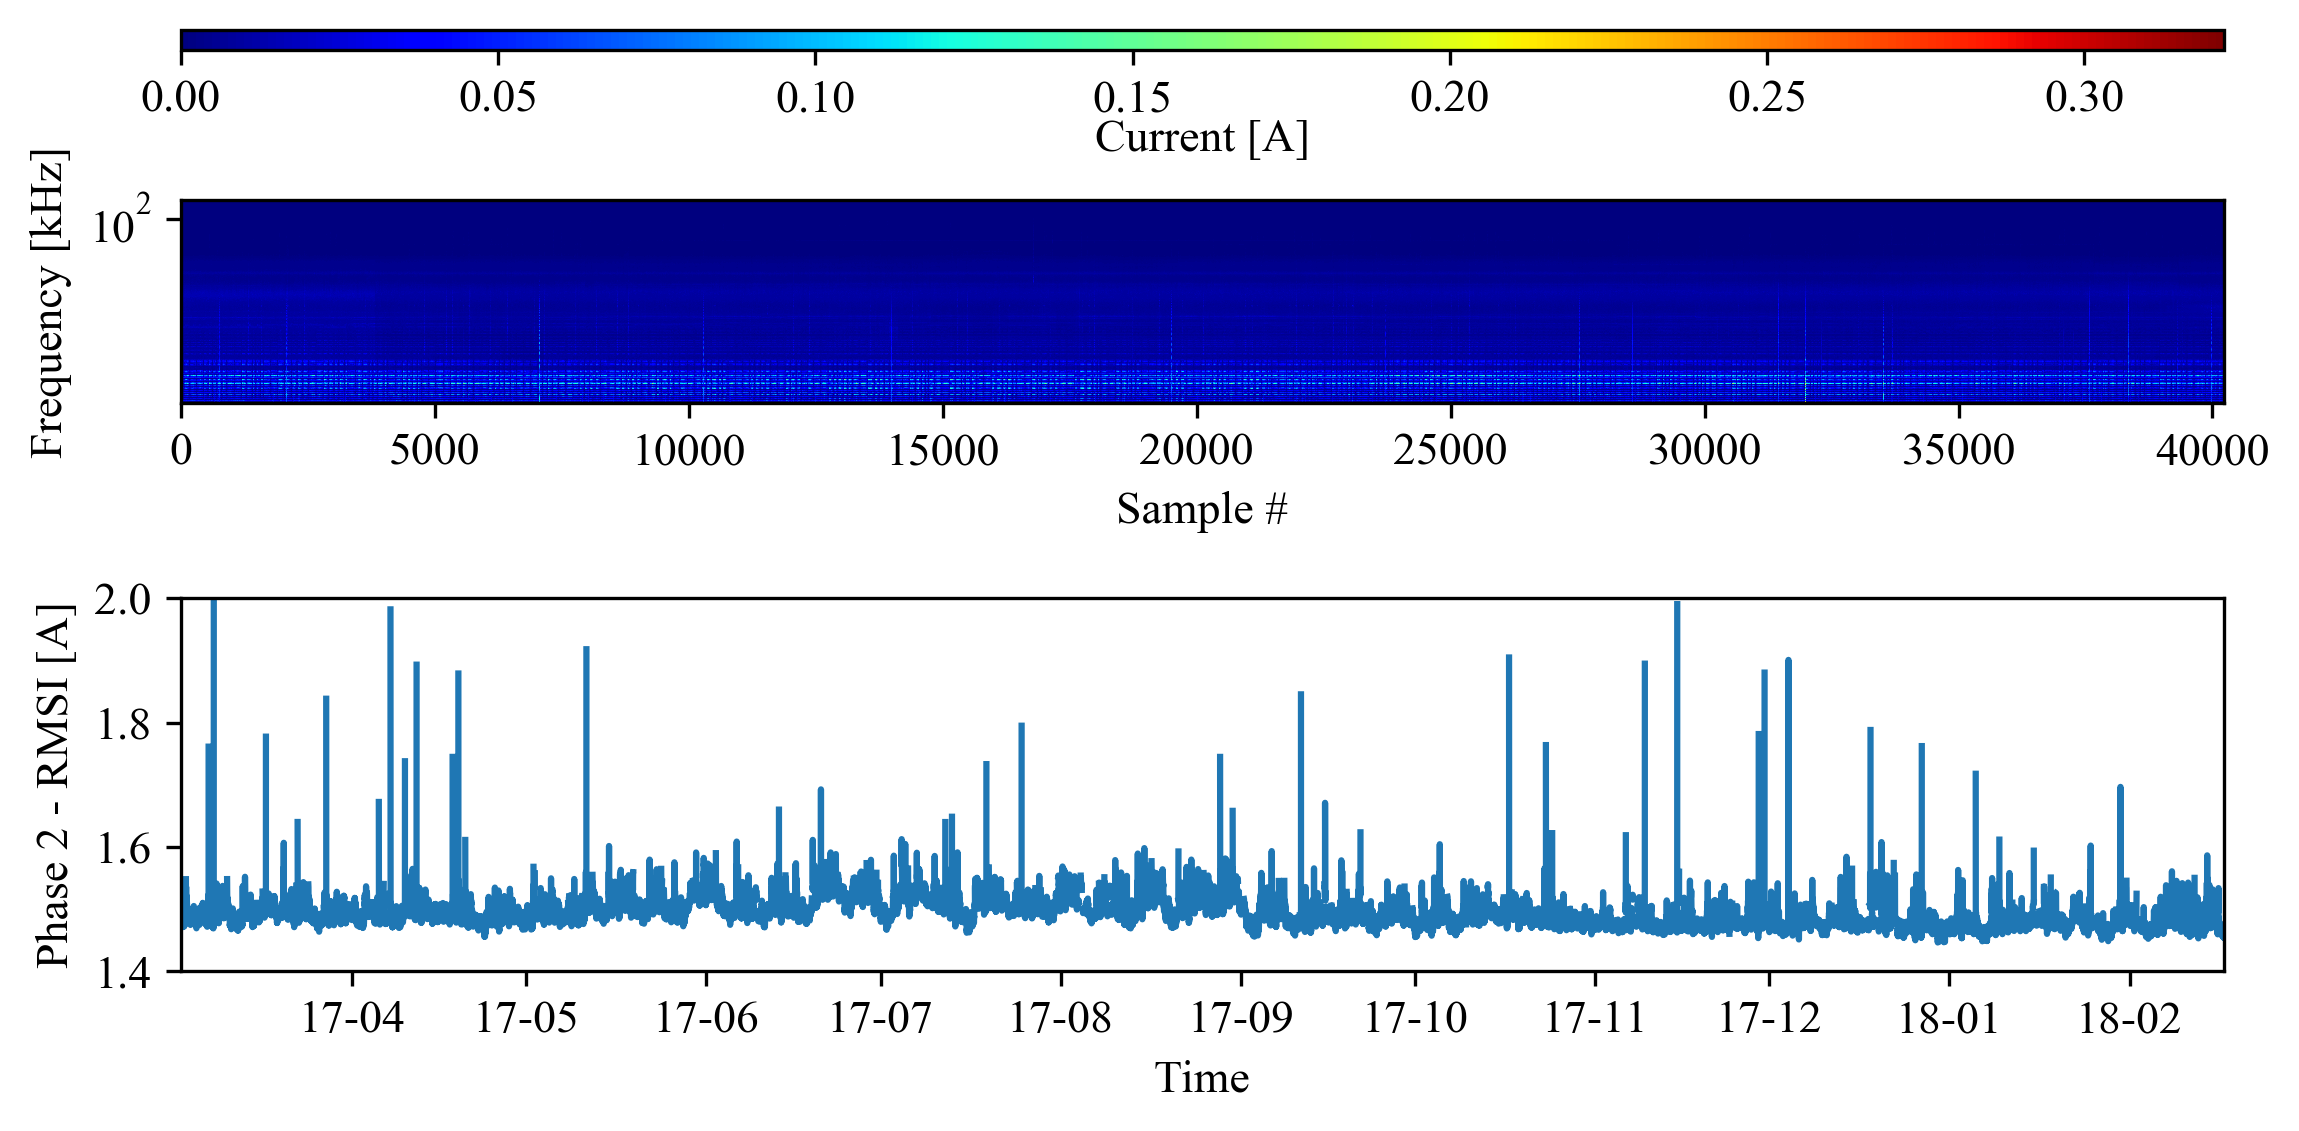

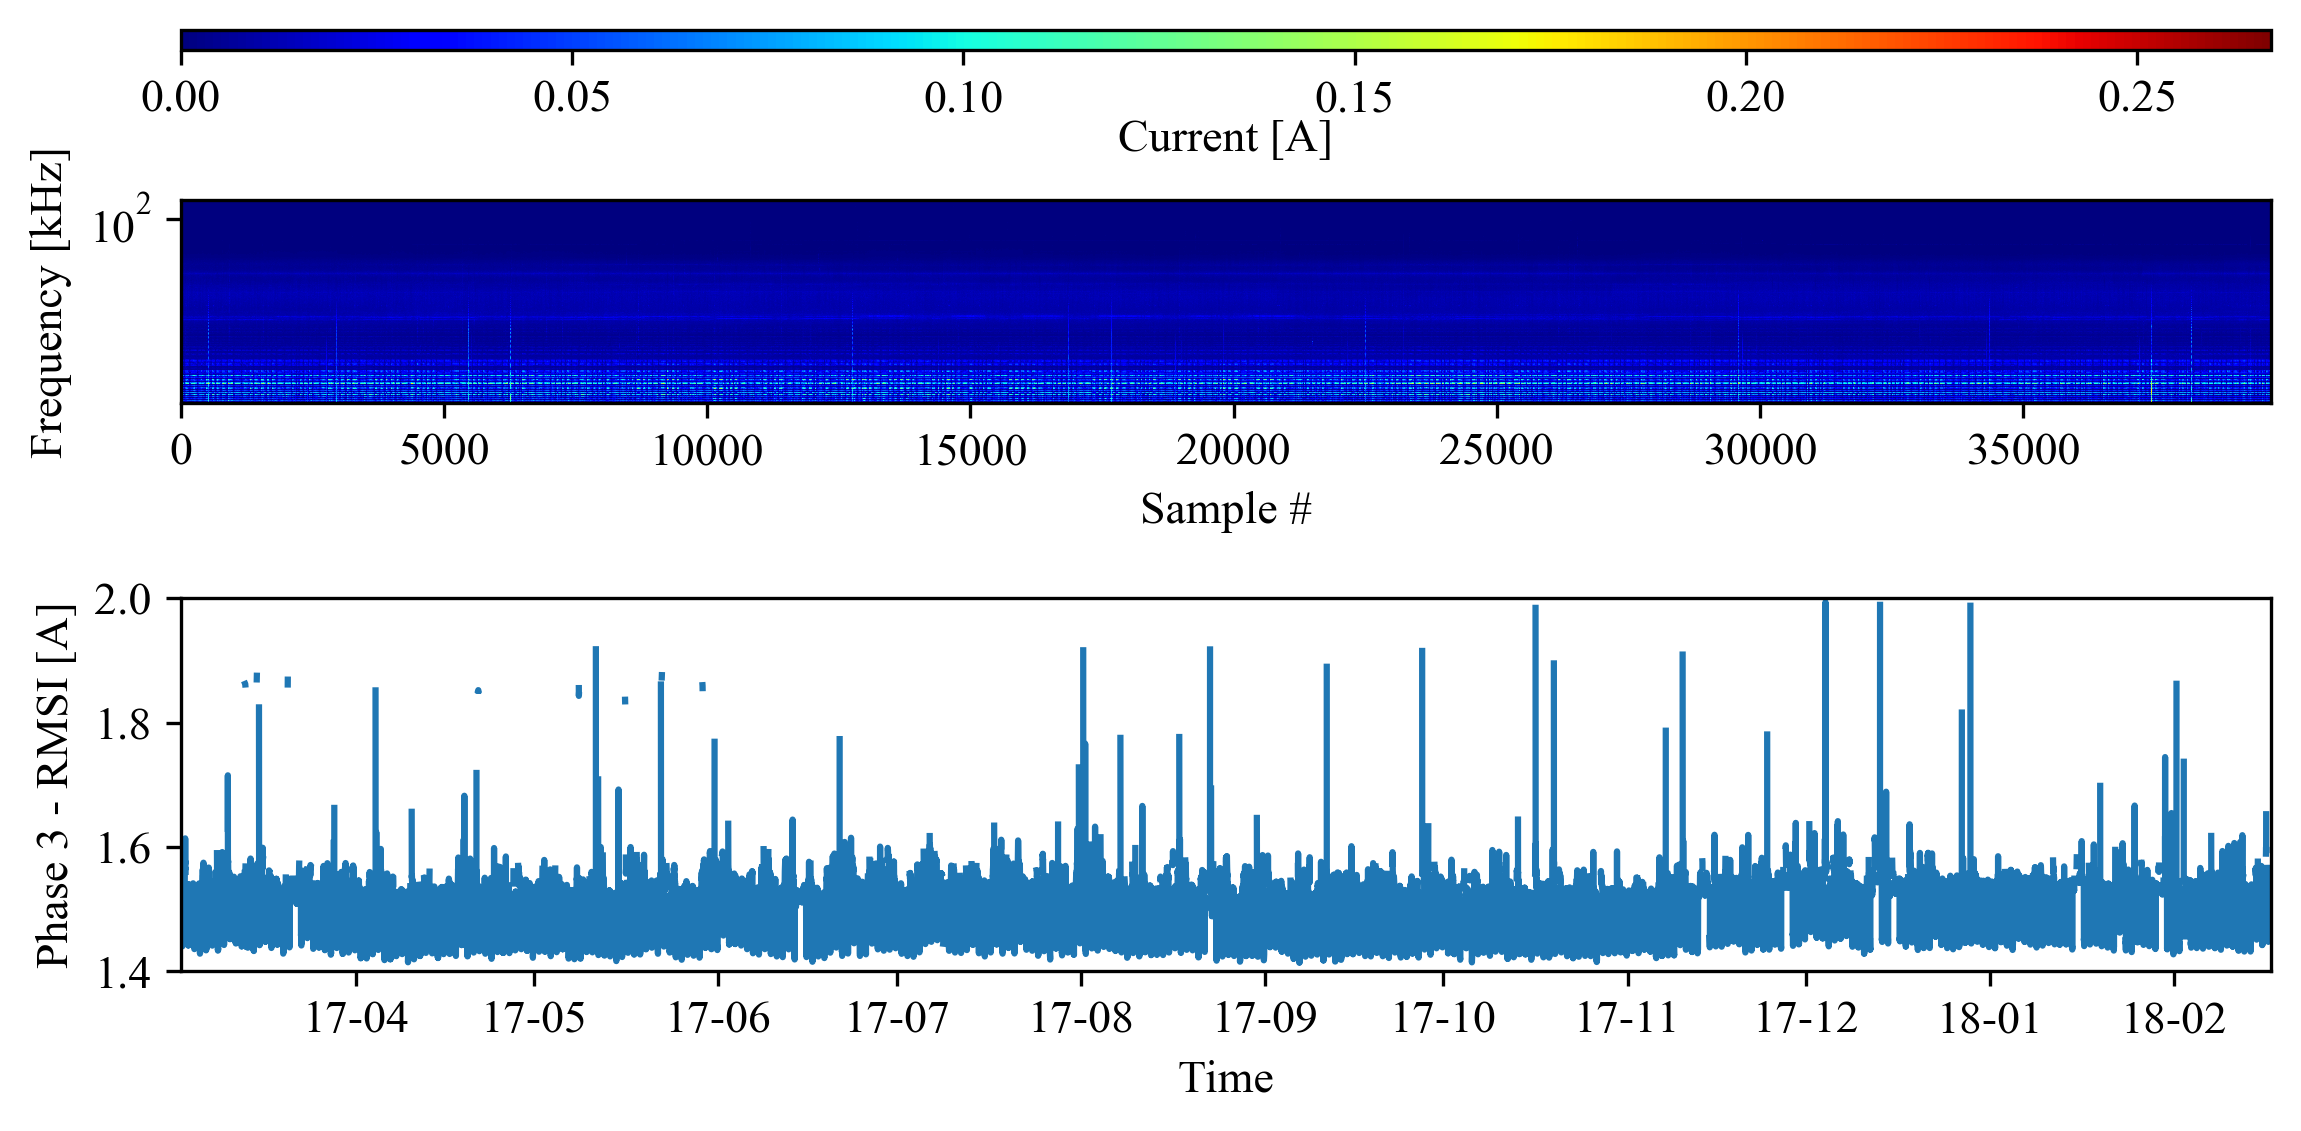

In [30]:
fig, ax = plt.subplots(2)
pos = ax[0].imshow(shi_2A_p1.transpose().astype(np.float32), origin='lower', aspect='auto', extent=[0,shi_2A_p1.shape[0],2,150], cmap='jet')
divider = make_axes_locatable(ax[0])
cax = divider.append_axes("top", size="10%", pad=.5)
cbar = plt.colorbar(pos, cax=cax, orientation='horizontal')
cbar.set_label('Current [A]', labelpad=-0.70, y=1.05, rotation=0)
ax[0].set_yscale('log')
ax[0].set_ylabel('Frequency [kHz]')
ax[0].set_xlabel("Sample #")
ax[0].axes.xaxis.set_visible(True)
ax[1].plot(rmsi_all_p1[rmsi_all_p1<2])
ax[1].set_ylabel('Phase 1 - RMSI [A]')
ax[1].set_ylim(1.4, 2)
ax[1].set_xlim(shi_all_p1.index[0], shi_all_p1.index[-1])
ax[1].xaxis.set_major_formatter(mdates.DateFormatter("%y-%m"))
ax[1].set_xlabel('Time')
fig.tight_layout()

fig, ax = plt.subplots(2)
pos = ax[0].imshow(shi_2A_p2.transpose().astype(np.float32), origin='lower', aspect='auto', extent=[0,shi_2A_p2.shape[0],2,150], cmap='jet')
divider = make_axes_locatable(ax[0])
cax = divider.append_axes("top", size="10%", pad=.5)
cbar = plt.colorbar(pos, cax=cax, orientation='horizontal')
cbar.set_label('Current [A]', labelpad=-0.70, y=1.05, rotation=0)
ax[0].set_yscale('log')
ax[0].set_ylabel('Frequency [kHz]')
ax[0].set_xlabel("Sample #")
ax[0].axes.xaxis.set_visible(True)
ax[1].plot(rmsi_all_p2[rmsi_all_p2<2])
ax[1].set_ylabel('Phase 2 - RMSI [A]')
ax[1].set_ylim(1.4, 2)
ax[1].set_xlim(shi_all_p2.index[0], shi_all_p2.index[-1])
ax[1].xaxis.set_major_formatter(mdates.DateFormatter("%y-%m"))
ax[1].set_xlabel('Time')
fig.tight_layout()

fig, ax = plt.subplots(2)
pos = ax[0].imshow(shi_2A_p3.transpose().astype(np.float32), origin='lower', aspect='auto', extent=[0,shi_2A_p3.shape[0],2,150], cmap='jet')
divider = make_axes_locatable(ax[0])
cax = divider.append_axes("top", size="10%", pad=.5)
cbar = plt.colorbar(pos, cax=cax, orientation='horizontal')
cbar.set_label('Current [A]', labelpad=-0.70, y=1.05, rotation=0)
ax[0].set_yscale('log')
ax[0].set_ylabel('Frequency [kHz]')
ax[0].set_xlabel("Sample #")
ax[0].axes.xaxis.set_visible(True)
ax[1].plot(rmsi_all_p3[rmsi_all_p3<2])
ax[1].set_ylabel('Phase 3 - RMSI [A]')
ax[1].set_ylim(1.4, 2)
ax[1].set_xlim(shi_all_p3.index[0], shi_all_p3.index[-1])
ax[1].xaxis.set_major_formatter(mdates.DateFormatter("%y-%m"))
ax[1].set_xlabel('Time')
fig.tight_layout()



In [43]:
d = shi_2A_p1
df = pd.DataFrame(data=d)
df.index = shi_2A_p1.index.tz_localize(None)
df.to_excel("4-51.xlsx")

In [44]:
d = shi_2A_p2
df = pd.DataFrame(data=d)
df.index = shi_2A_p2.index.tz_localize(None)
df.to_excel("4-52.xlsx")
d = shi_2A_p3
df = pd.DataFrame(data=d)
df.index = shi_2A_p3.index.tz_localize(None)
df.to_excel("4-53.xlsx")

### BusinessDays

In [32]:
datelist = pd.bdate_range(start="2017-03-02", end="2018-02-17").strftime("%Y-%m-%d").astype(str).to_list()

In [33]:
rmsi_all_p1 = pd.DataFrame()
shi_all_p1 = pd.DataFrame()
rmsi_all_p2 = pd.DataFrame()
shi_all_p2 = pd.DataFrame()
rmsi_all_p3 = pd.DataFrame()
shi_all_p3 = pd.DataFrame()

for date in datelist:
    rmsi_all_p1 = rmsi_all_p1.append(pd.read_pickle("E:\\resampled_phasevise\\rmsi\\" + date + "_rmsi_10min_mean_p1.p"))
    shi_all_p1 = shi_all_p1.append(pd.read_pickle("E:\\resampled_phasevise\\i\\" + date + "_harmonics10min_i_max_p1.p"))
    
    rmsi_all_p2 = rmsi_all_p2.append(pd.read_pickle("E:\\resampled_phasevise\\rmsi\\" + date + "_rmsi_10min_mean_p2.p"))
    shi_all_p2 = shi_all_p2.append(pd.read_pickle("E:\\resampled_phasevise\\i\\" + date + "_harmonics10min_i_max_p2.p"))
    
    rmsi_all_p3 = rmsi_all_p3.append(pd.read_pickle("E:\\resampled_phasevise\\rmsi\\" + date + "_rmsi_10min_mean_p3.p"))
    shi_all_p3 = shi_all_p3.append(pd.read_pickle("E:\\resampled_phasevise\\i\\" + date + "_harmonics10min_i_max_p3.p"))

In [34]:
mask = rmsi_all_p1<2
shi_2A_p1 = shi_all_p1.loc[mask[0]]

mask2 = rmsi_all_p2<2
shi_2A_p2 = shi_all_p2.loc[mask2[0]]

mask3 = rmsi_all_p3<2
shi_2A_p3 = shi_all_p3.loc[mask3[0]]

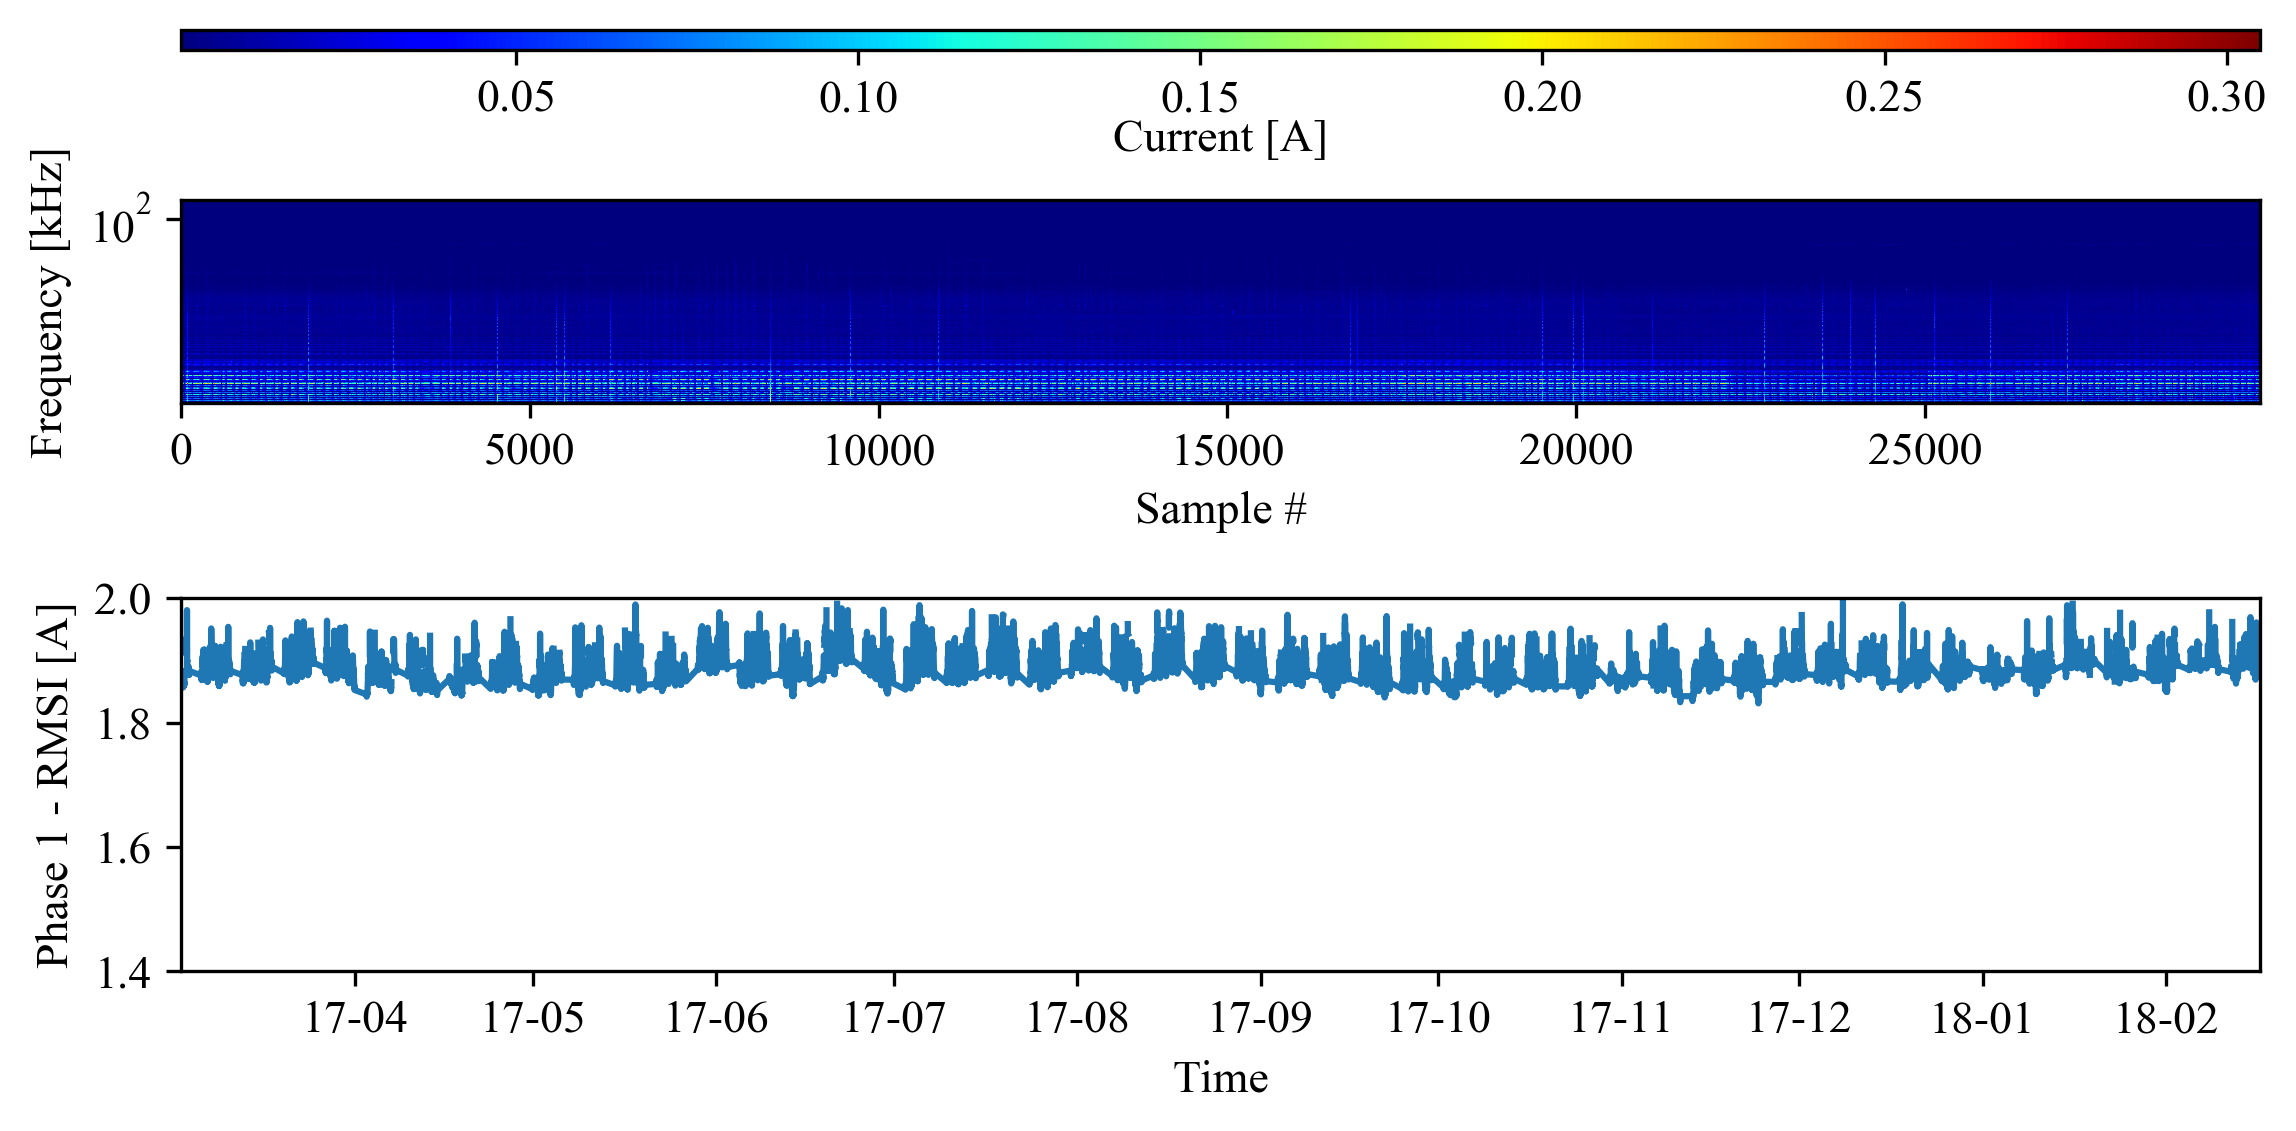

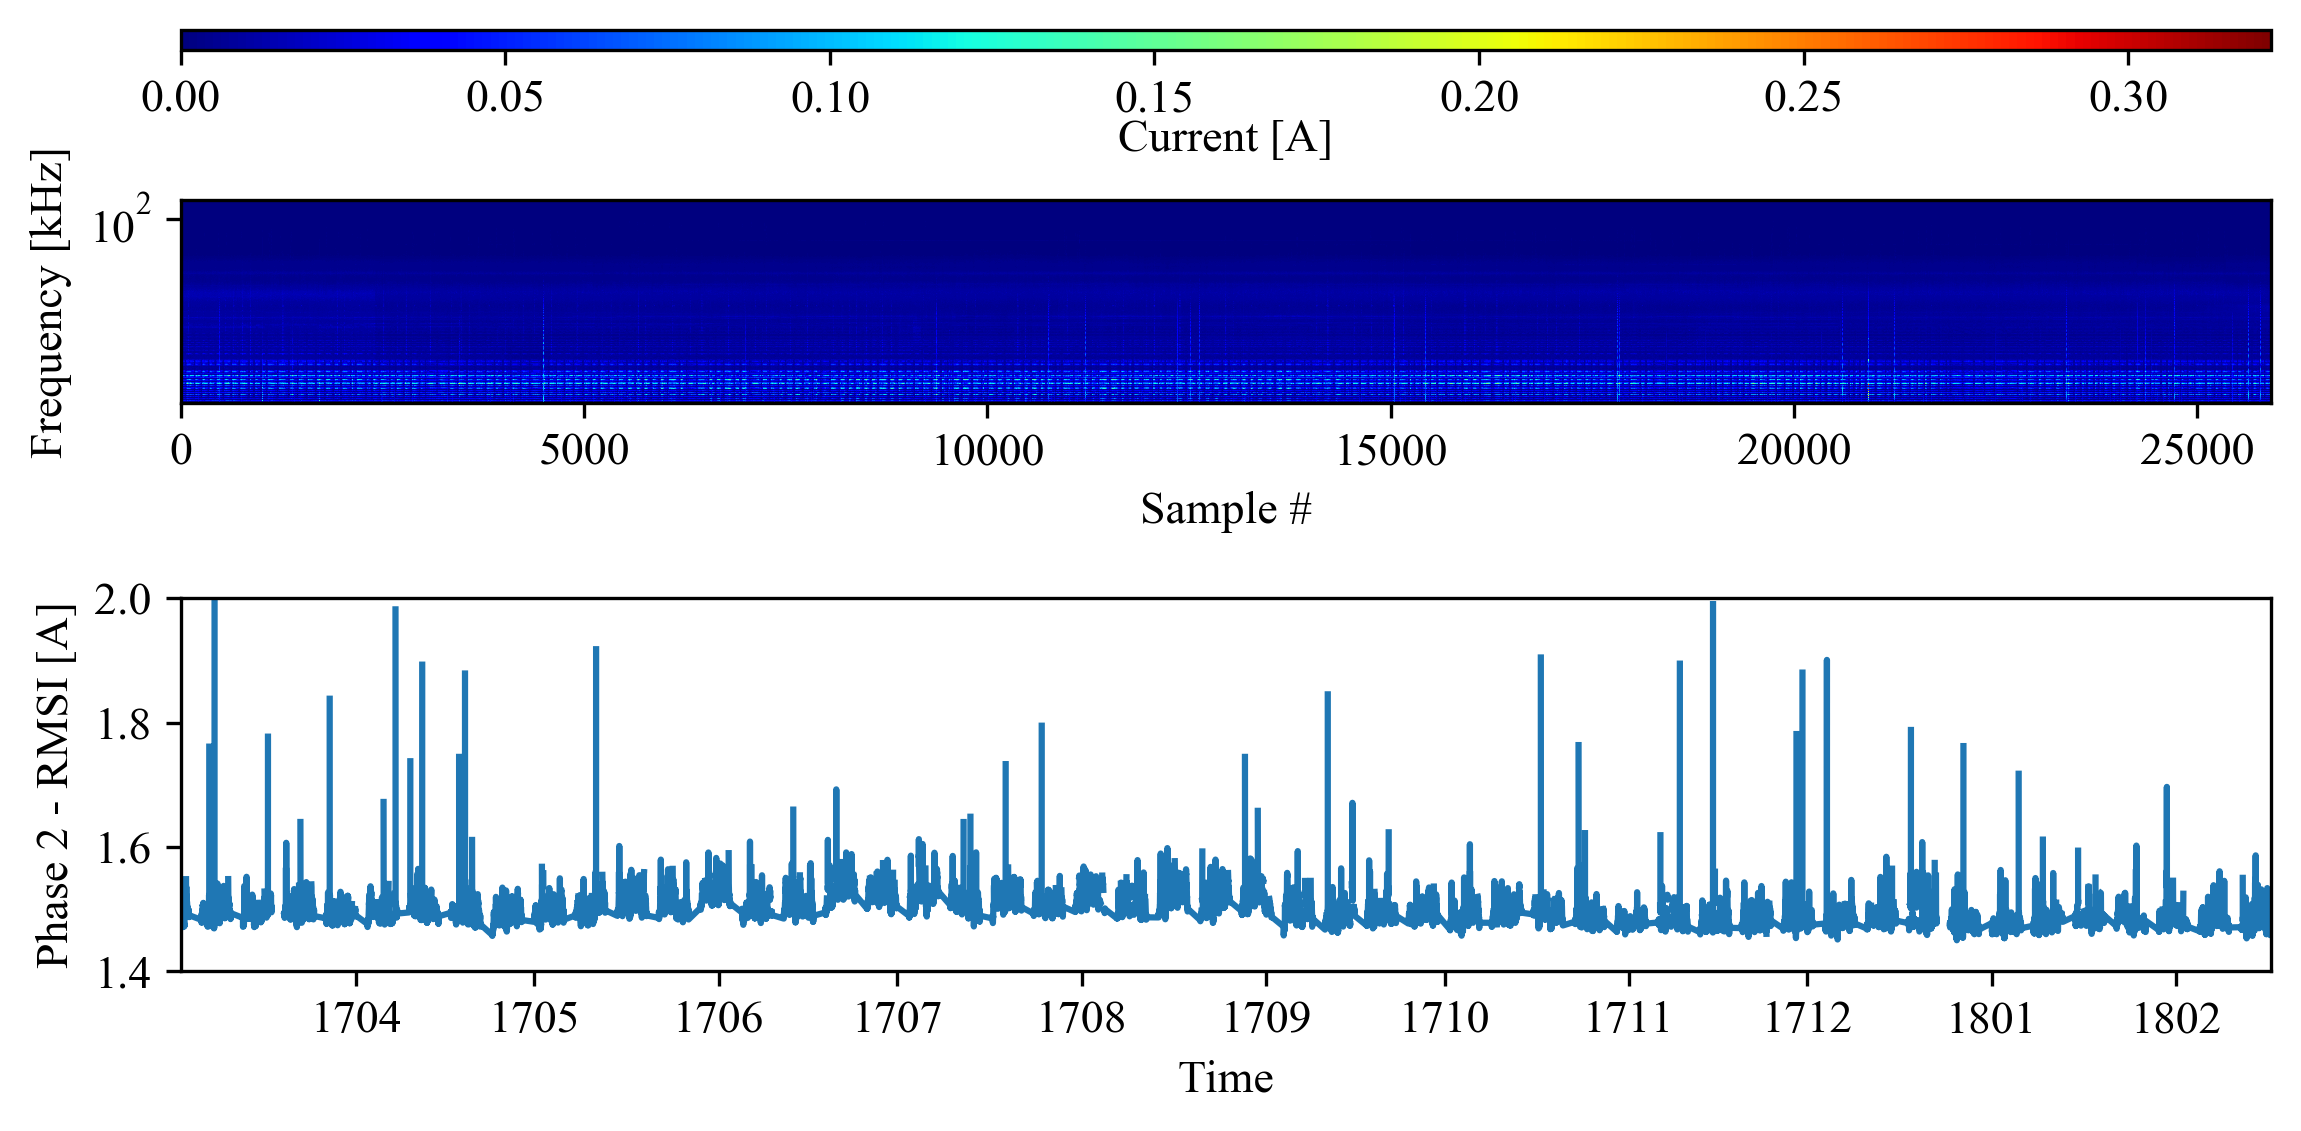

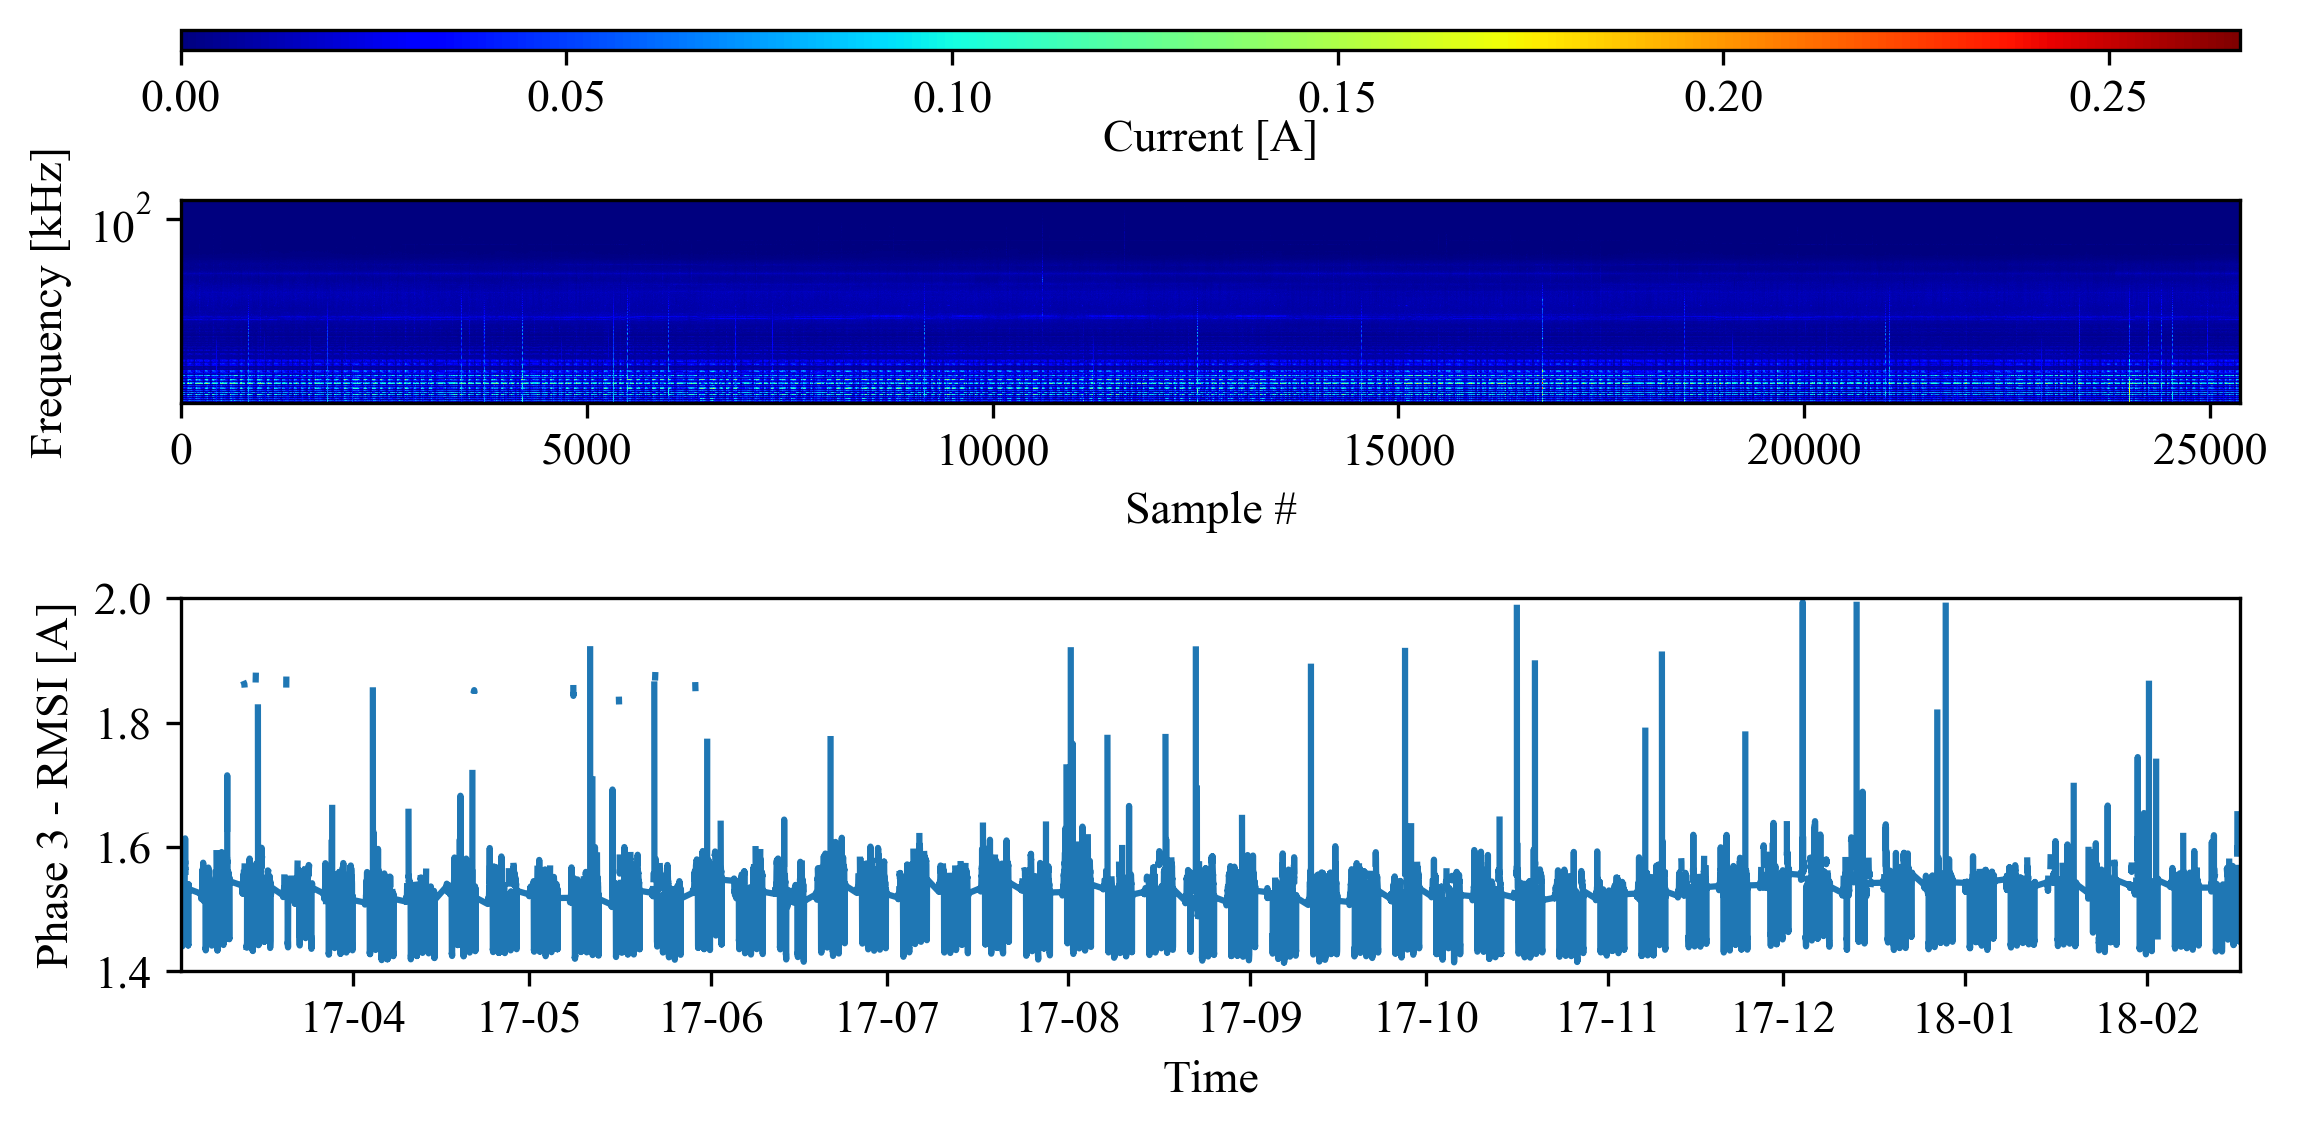

In [35]:
fig, ax = plt.subplots(2)
pos = ax[0].imshow(shi_2A_p1.transpose().astype(np.float32), origin='lower', aspect='auto', extent=[0,shi_2A_p1.shape[0],2,150], cmap='jet')
divider = make_axes_locatable(ax[0])
cax = divider.append_axes("top", size="10%", pad=.5)
cbar = plt.colorbar(pos, cax=cax, orientation='horizontal')
cbar.set_label('Current [A]', labelpad=-0.70, y=1.05, rotation=0)
ax[0].set_yscale('log')
ax[0].set_ylabel('Frequency [kHz]')
ax[0].set_xlabel("Sample #")
ax[0].axes.xaxis.set_visible(True)
ax[1].plot(rmsi_all_p1[rmsi_all_p1<2])
ax[1].set_ylabel('Phase 1 - RMSI [A]')
ax[1].set_ylim(1.4, 2)
ax[1].set_xlim(shi_all_p1.index[0], shi_all_p1.index[-1])
ax[1].xaxis.set_major_formatter(mdates.DateFormatter("%y-%m"))
ax[1].set_xlabel('Time')
fig.tight_layout()


fig, ax = plt.subplots(2)
pos = ax[0].imshow(shi_2A_p2.transpose().astype(np.float32), origin='lower', aspect='auto', extent=[0,shi_2A_p2.shape[0],2,150], cmap='jet')
divider = make_axes_locatable(ax[0])
cax = divider.append_axes("top", size="10%", pad=.5)
cbar = plt.colorbar(pos, cax=cax, orientation='horizontal')
cbar.set_label('Current [A]', labelpad=-0.70, y=1.05, rotation=0)
ax[0].set_yscale('log')
ax[0].set_ylabel('Frequency [kHz]')
ax[0].set_xlabel("Sample #")
ax[0].axes.xaxis.set_visible(True)
ax[1].plot(rmsi_all_p2[rmsi_all_p2<2])
ax[1].set_ylabel('Phase 2 - RMSI [A]')
ax[1].set_ylim(1.4, 2)
ax[1].set_xlim(shi_all_p2.index[0], shi_all_p2.index[-1])
ax[1].xaxis.set_major_formatter(mdates.DateFormatter("%y%m"))
ax[1].set_xlabel('Time')
fig.tight_layout()


fig, ax = plt.subplots(2)
pos = ax[0].imshow(shi_2A_p3.transpose().astype(np.float32), origin='lower', aspect='auto', extent=[0,shi_2A_p3.shape[0],2,150], cmap='jet')
divider = make_axes_locatable(ax[0])
cax = divider.append_axes("top", size="10%", pad=.5)
cbar = plt.colorbar(pos, cax=cax, orientation='horizontal')
cbar.set_label('Current [A]', labelpad=-0.70, y=1.05, rotation=0)
ax[0].set_yscale('log')
ax[0].set_ylabel('Frequency [kHz]')
ax[0].set_xlabel("Sample #")
ax[0].axes.xaxis.set_visible(True)
ax[1].plot(rmsi_all_p3[rmsi_all_p3<2])
ax[1].set_ylabel('Phase 3 - RMSI [A]')
ax[1].set_ylim(1.4, 2)
ax[1].set_xlim(shi_all_p3.index[0], shi_all_p3.index[-1])
ax[1].xaxis.set_major_formatter(mdates.DateFormatter("%y-%m"))
ax[1].set_xlabel('Time')
fig.tight_layout()



### Weekend

In [36]:
wedays = pd.date_range(start="2017-03-02", end="2018-02-17")
wedays = wedays[wedays.dayofweek > 4].strftime("%Y-%m-%d").astype(str).to_list()

In [37]:
datelist = wedays

In [38]:
rmsi_all_p1 = pd.DataFrame()
shi_all_p1 = pd.DataFrame()
rmsi_all_p2 = pd.DataFrame()
shi_all_p2 = pd.DataFrame()
rmsi_all_p3 = pd.DataFrame()
shi_all_p3 = pd.DataFrame()

for date in datelist:
    rmsi_all_p1 = rmsi_all_p1.append(pd.read_pickle("E:\\resampled_phasevise\\rmsi\\" + date + "_rmsi_10min_mean_p1.p"))
    shi_all_p1 = shi_all_p1.append(pd.read_pickle("E:\\resampled_phasevise\\i\\" + date + "_harmonics10min_i_max_p1.p"))
    
    rmsi_all_p2 = rmsi_all_p2.append(pd.read_pickle("E:\\resampled_phasevise\\rmsi\\" + date + "_rmsi_10min_mean_p2.p"))
    shi_all_p2 = shi_all_p2.append(pd.read_pickle("E:\\resampled_phasevise\\i\\" + date + "_harmonics10min_i_max_p2.p"))
    
    rmsi_all_p3 = rmsi_all_p3.append(pd.read_pickle("E:\\resampled_phasevise\\rmsi\\" + date + "_rmsi_10min_mean_p3.p"))
    shi_all_p3 = shi_all_p3.append(pd.read_pickle("E:\\resampled_phasevise\\i\\" + date + "_harmonics10min_i_max_p3.p"))

In [39]:
mask = rmsi_all_p1<2
shi_2A_p1 = shi_all_p1.loc[mask[0]]

mask2 = rmsi_all_p2<2
shi_2A_p2 = shi_all_p2.loc[mask2[0]]

mask3 = rmsi_all_p3<2
shi_2A_p3 = shi_all_p3.loc[mask3[0]]

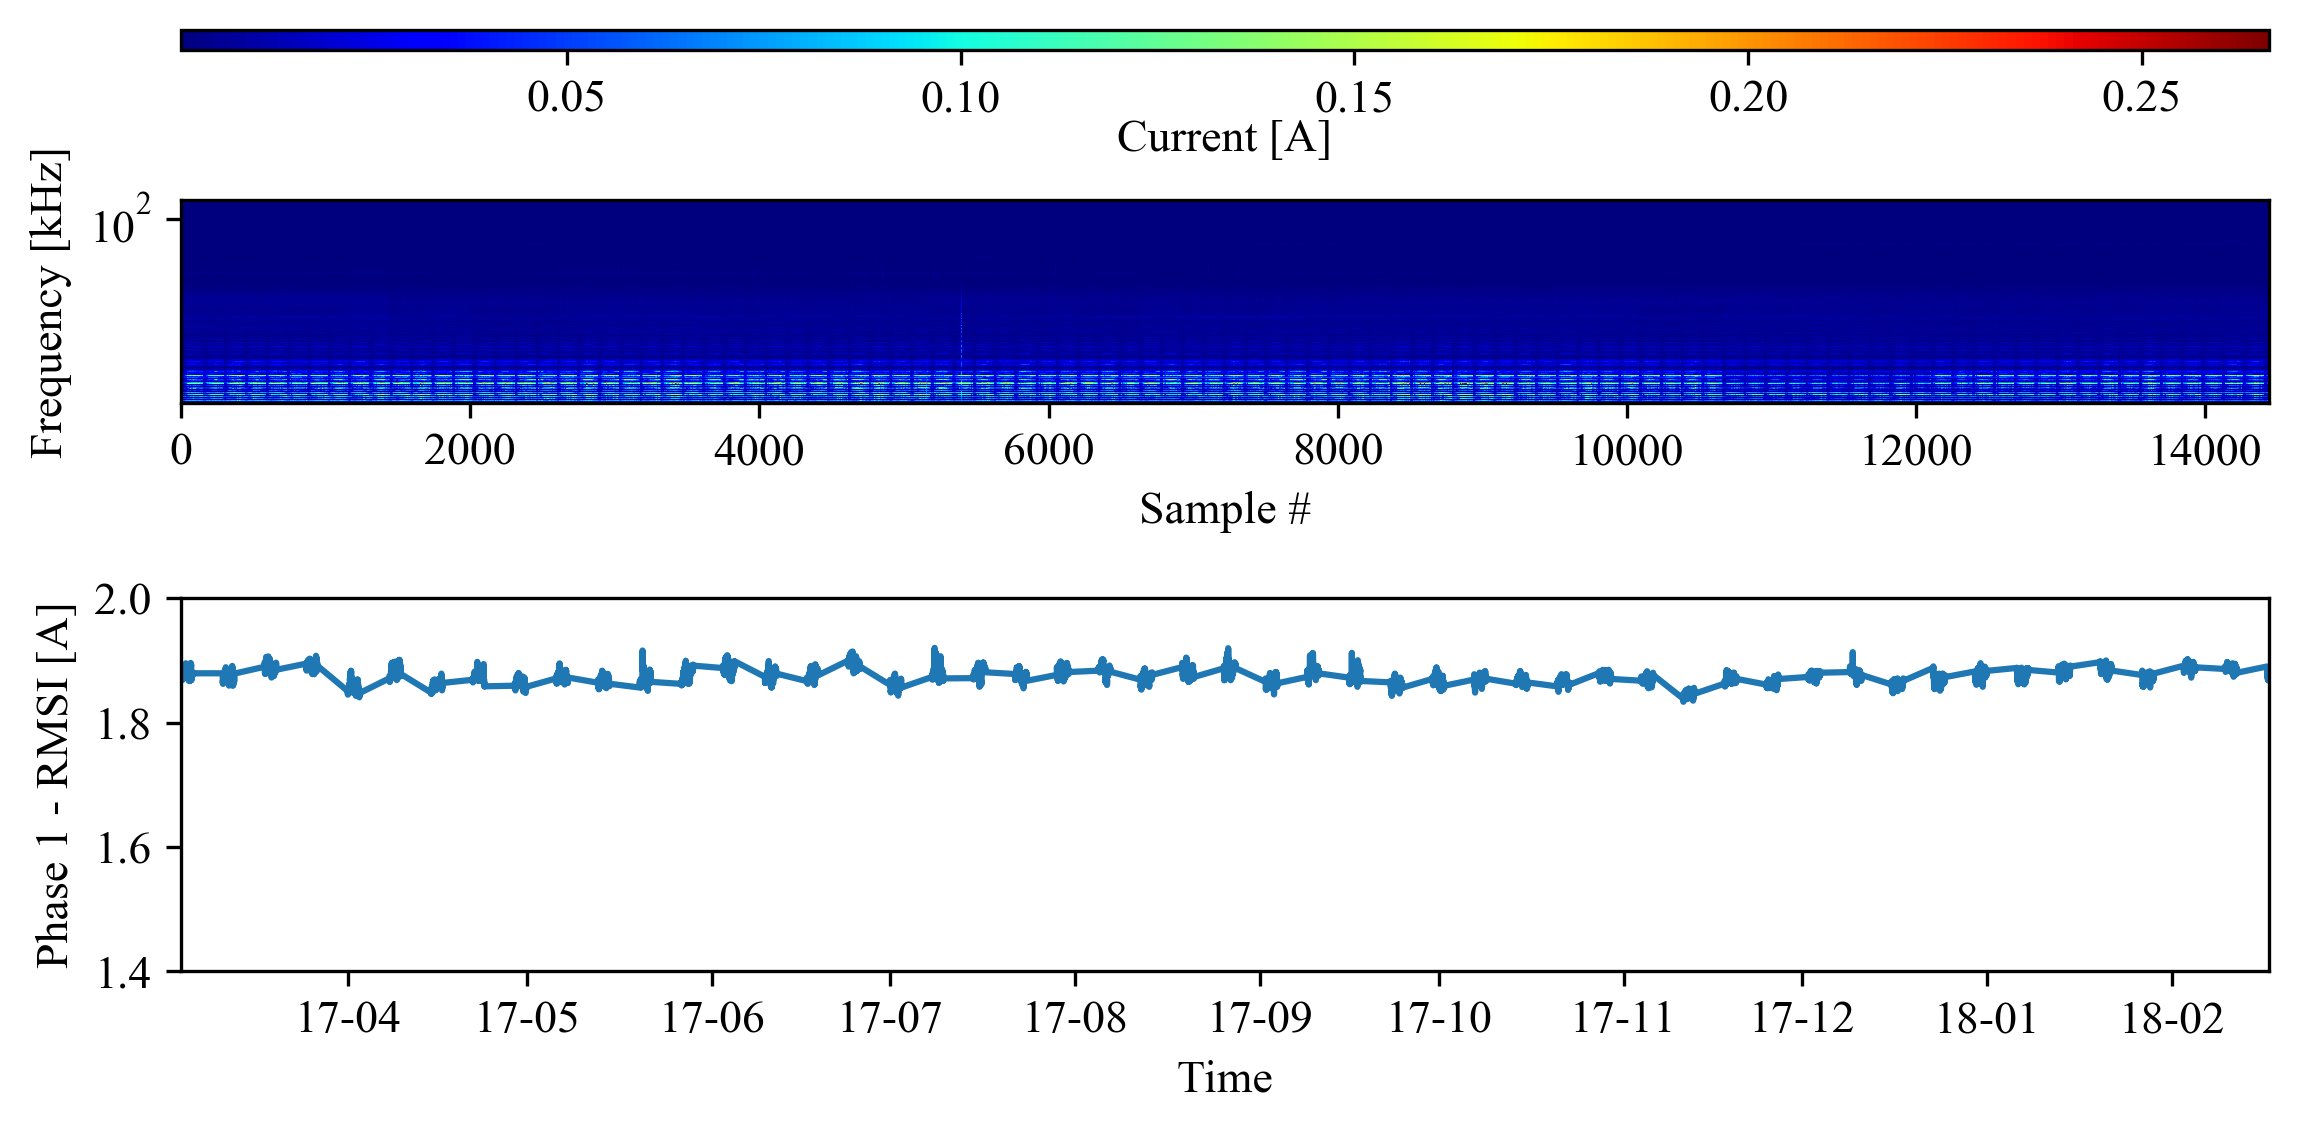

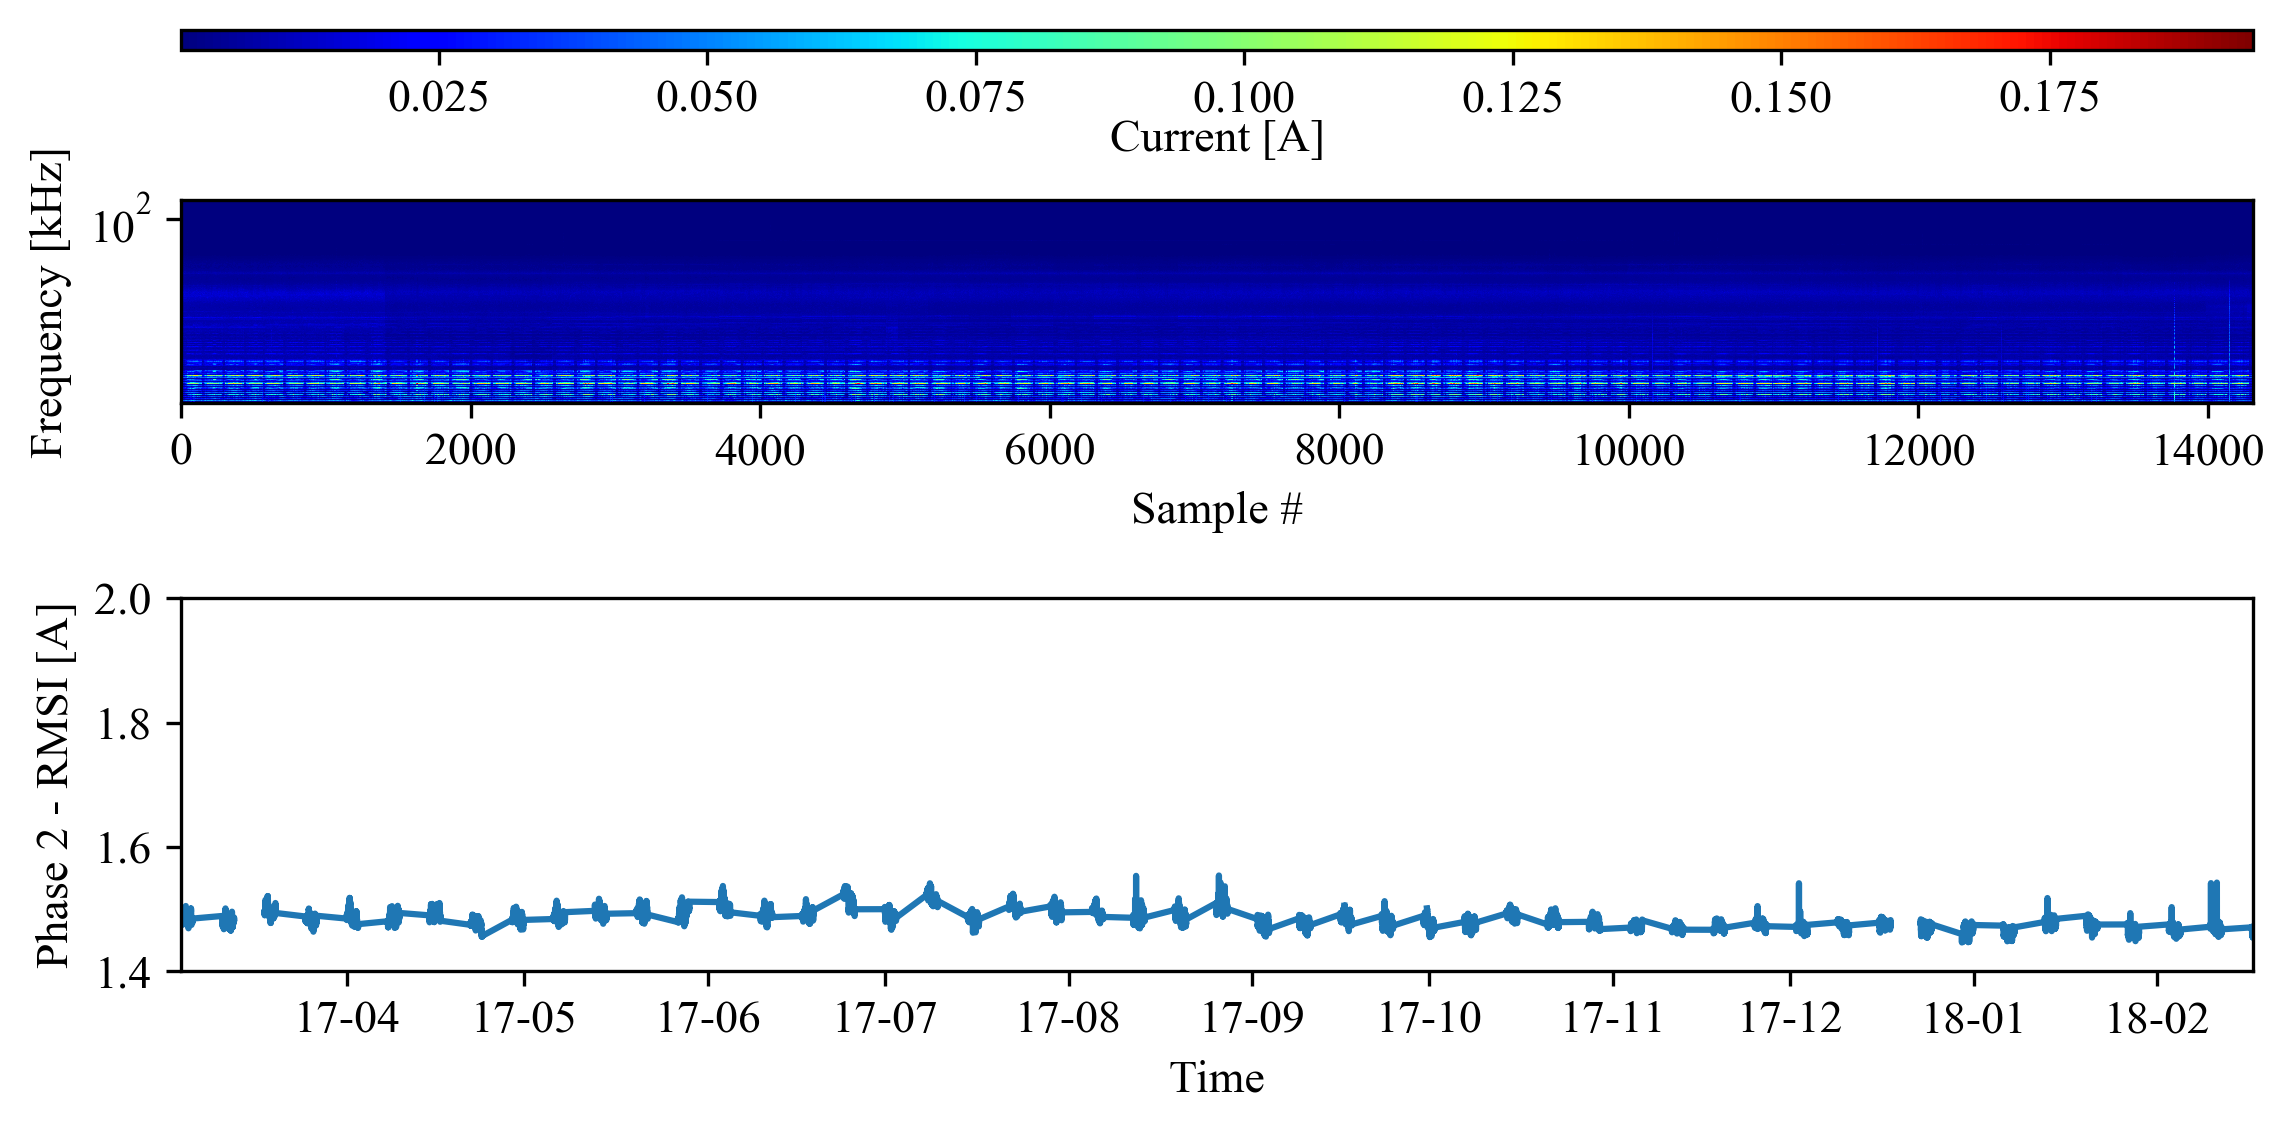

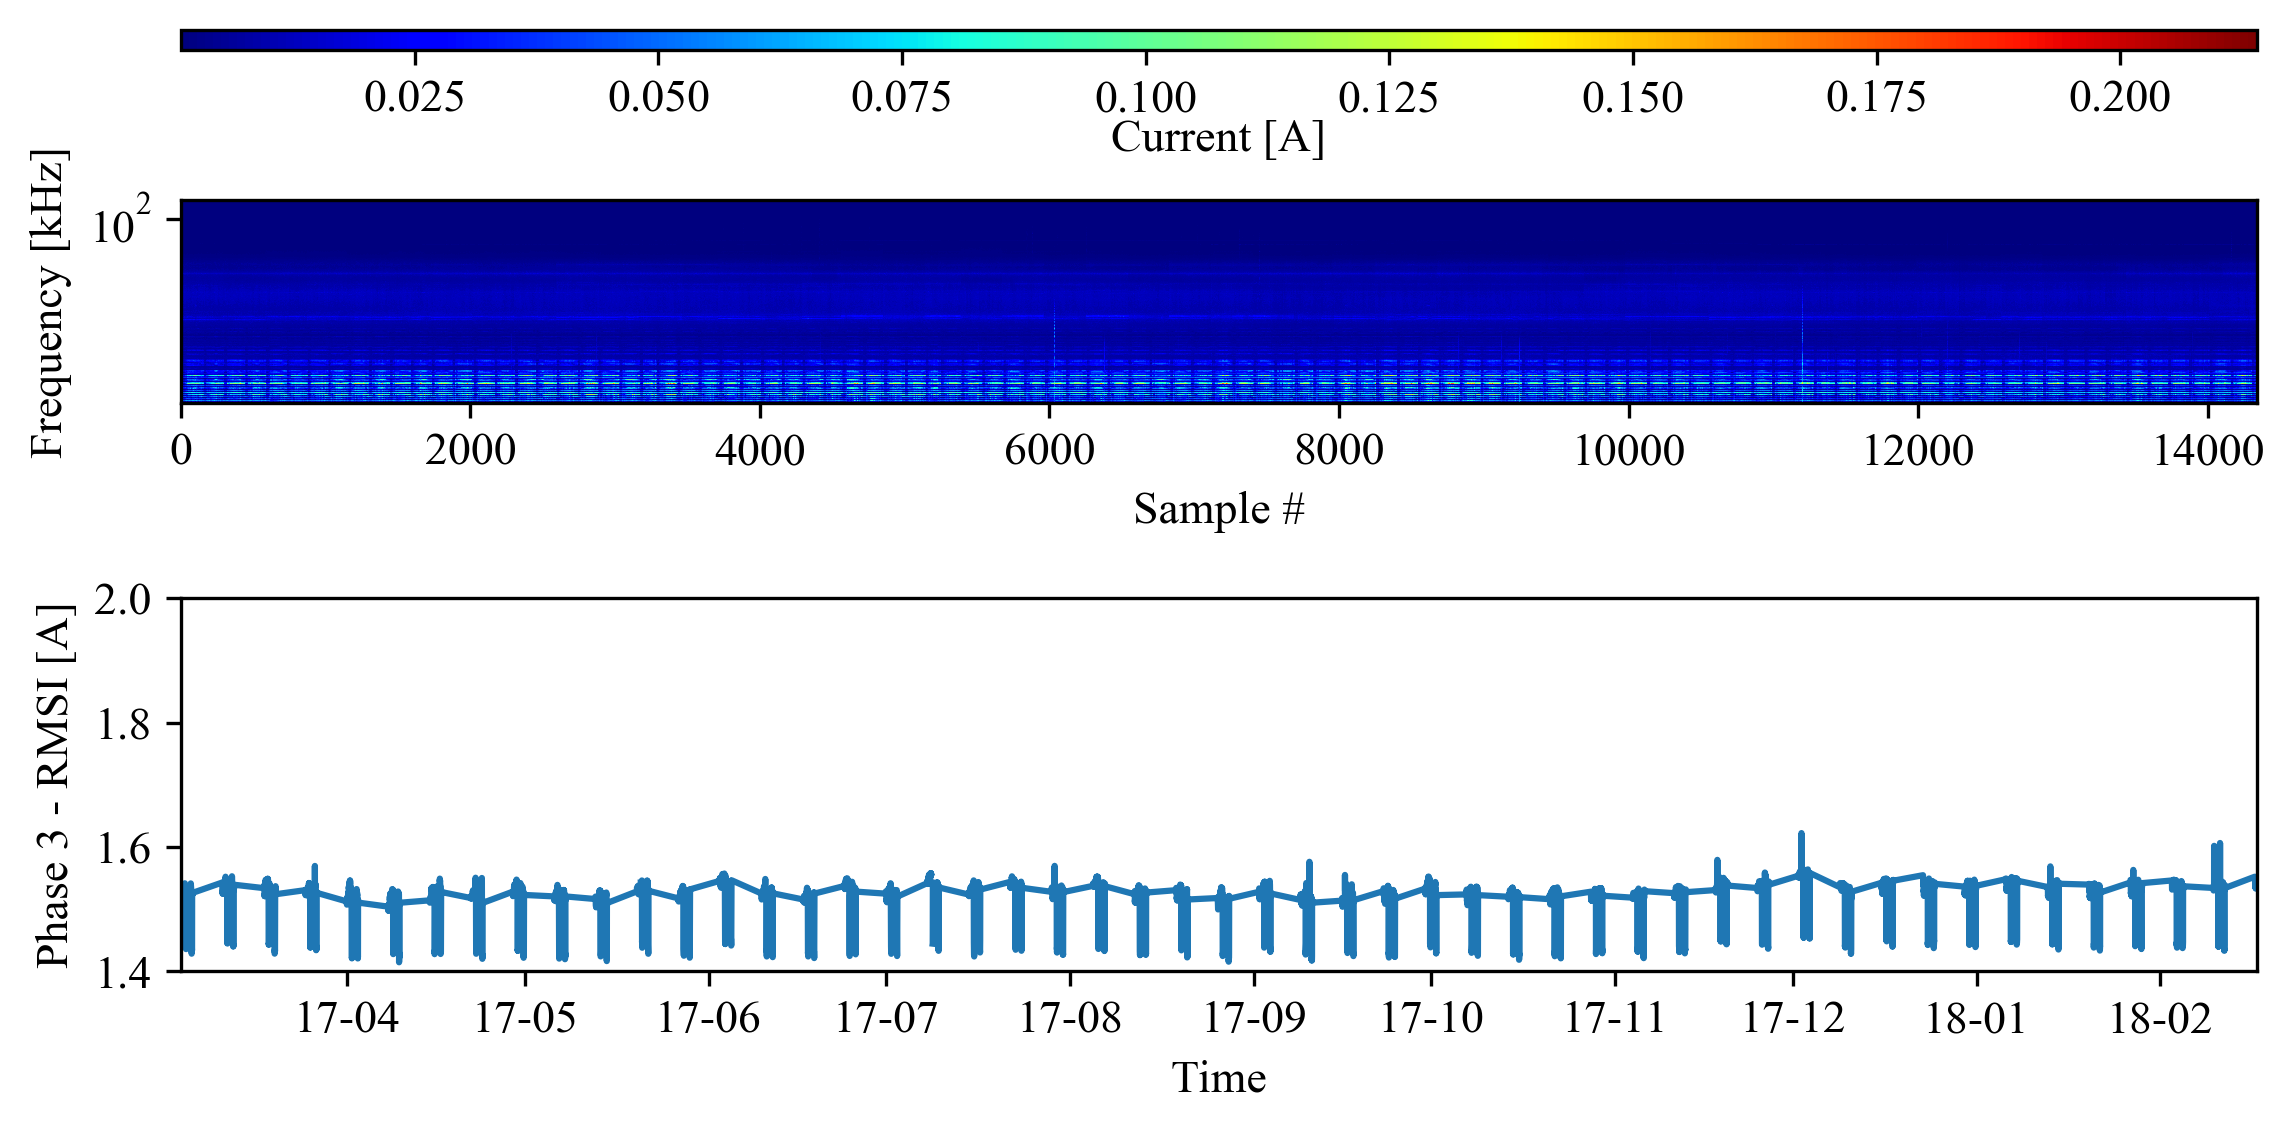

In [40]:
fig, ax = plt.subplots(2)
pos = ax[0].imshow(shi_2A_p1.transpose().astype(np.float32), origin='lower', aspect='auto', extent=[0,shi_2A_p1.shape[0],2,150], cmap='jet')
divider = make_axes_locatable(ax[0])
cax = divider.append_axes("top", size="10%", pad=.5)
cbar = plt.colorbar(pos, cax=cax, orientation='horizontal')
cbar.set_label('Current [A]', labelpad=-0.70, y=1.05, rotation=0)
ax[0].set_yscale('log')
ax[0].set_ylabel('Frequency [kHz]')
ax[0].set_xlabel("Sample #")
ax[0].axes.xaxis.set_visible(True)
ax[1].plot(rmsi_all_p1[rmsi_all_p1<2])
ax[1].set_ylabel('Phase 1 - RMSI [A]')
ax[1].set_ylim(1.4, 2)
ax[1].set_xlim(shi_all_p1.index[0], shi_all_p1.index[-1])
ax[1].xaxis.set_major_formatter(mdates.DateFormatter("%y-%m"))
ax[1].set_xlabel('Time')
fig.tight_layout()


fig, ax = plt.subplots(2)
pos = ax[0].imshow(shi_2A_p2.transpose().astype(np.float32), origin='lower', aspect='auto', extent=[0,shi_2A_p2.shape[0],2,150], cmap='jet')
divider = make_axes_locatable(ax[0])
cax = divider.append_axes("top", size="10%", pad=.5)
cbar = plt.colorbar(pos, cax=cax, orientation='horizontal')
cbar.set_label('Current [A]', labelpad=-0.70, y=1.05, rotation=0)
ax[0].set_yscale('log')
ax[0].set_ylabel('Frequency [kHz]')
ax[0].set_xlabel("Sample #")
ax[0].axes.xaxis.set_visible(True)
ax[1].plot(rmsi_all_p2[rmsi_all_p2<2])
ax[1].set_ylabel('Phase 2 - RMSI [A]')
ax[1].set_ylim(1.4, 2)
ax[1].set_xlim(shi_all_p2.index[0], shi_all_p2.index[-1])
ax[1].xaxis.set_major_formatter(mdates.DateFormatter("%y-%m"))
ax[1].set_xlabel('Time')
fig.tight_layout()

fig, ax = plt.subplots(2)
pos = ax[0].imshow(shi_2A_p3.transpose().astype(np.float32), origin='lower', aspect='auto', extent=[0,shi_2A_p3.shape[0],2,150], cmap='jet')
divider = make_axes_locatable(ax[0])
cax = divider.append_axes("top", size="10%", pad=.5)
cbar = plt.colorbar(pos, cax=cax, orientation='horizontal')
cbar.set_label('Current [A]', labelpad=-0.70, y=1.05, rotation=0)
ax[0].set_yscale('log')
ax[0].set_ylabel('Frequency [kHz]')
ax[0].set_xlabel("Sample #")
ax[0].axes.xaxis.set_visible(True)
ax[1].plot(rmsi_all_p3[rmsi_all_p3<2])
ax[1].set_ylabel('Phase 3 - RMSI [A]')
ax[1].set_ylim(1.4, 2)
ax[1].set_xlim(shi_all_p3.index[0], shi_all_p3.index[-1])
ax[1].xaxis.set_major_formatter(mdates.DateFormatter("%y-%m"))
ax[1].set_xlabel('Time')
fig.tight_layout()


### 6:00 - 18:00

In [16]:
datelist = pd.date_range(start="2017-03-02", end="2018-02-17").strftime("%Y-%m-%d").astype(str).to_list()
#datelist = pd.date_range(start="2017-03-02", end="2017-04-30").strftime("%Y-%m-%d").astype(str).to_list()

#datelist = ["2017-03-02"]

In [17]:
rmsi_all_p1 = pd.DataFrame()
shi_all_p1 = pd.DataFrame()
rmsi_all_p2 = pd.DataFrame()
shi_all_p2 = pd.DataFrame()
rmsi_all_p3 = pd.DataFrame()
shi_all_p3 = pd.DataFrame()

for date in datelist:
    rmsi_all_p1 = rmsi_all_p1.append(pd.read_pickle("E:\\resampled_phasevise\\rmsi\\" + date + "_rmsi_10min_mean_p1.p"))
    shi_all_p1 = shi_all_p1.append(pd.read_pickle("E:\\resampled_phasevise\\i\\" + date + "_harmonics10min_i_max_p1.p"))
    
    rmsi_all_p2 = rmsi_all_p2.append(pd.read_pickle("E:\\resampled_phasevise\\rmsi\\" + date + "_rmsi_10min_mean_p2.p"))
    shi_all_p2 = shi_all_p2.append(pd.read_pickle("E:\\resampled_phasevise\\i\\" + date + "_harmonics10min_i_max_p2.p"))
    
    rmsi_all_p3 = rmsi_all_p3.append(pd.read_pickle("E:\\resampled_phasevise\\rmsi\\" + date + "_rmsi_10min_mean_p3.p"))
    shi_all_p3 = shi_all_p3.append(pd.read_pickle("E:\\resampled_phasevise\\i\\" + date + "_harmonics10min_i_max_p3.p"))

In [18]:
mask = rmsi_all_p1<2
shi_2A_p1 = shi_all_p1.loc[mask[0]]

mask2 = rmsi_all_p2<2
shi_2A_p2 = shi_all_p2.loc[mask2[0]]

mask3 = rmsi_all_p3<2
shi_2A_p3 = shi_all_p3.loc[mask3[0]]

rmsi_2A_p1 = rmsi_all_p1.loc[mask[0]]
rmsi_2A_p2 = rmsi_all_p2.loc[mask2[0]]
rmsi_2A_p3 = rmsi_all_p3.loc[mask3[0]]

In [19]:
shi_2A_day_p1 = shi_2A_p1[(shi_2A_p1.index.hour > 6) & (shi_2A_p1.index.hour < 18)]
shi_2A_day_p2 = shi_2A_p2[(shi_2A_p2.index.hour > 6) & (shi_2A_p2.index.hour < 18)]
shi_2A_day_p3 = shi_2A_p3[(shi_2A_p3.index.hour > 6) & (shi_2A_p3.index.hour < 18)]

rmsi_2A_day_p1 = rmsi_2A_p1[(rmsi_2A_p1.index.hour > 6) & (rmsi_2A_p1.index.hour < 18)]
rmsi_2A_day_p2 = rmsi_2A_p2[(rmsi_2A_p2.index.hour > 6) & (rmsi_2A_p2.index.hour < 18)]
rmsi_2A_day_p3 = rmsi_2A_p3[(rmsi_2A_p3.index.hour > 6) & (rmsi_2A_p3.index.hour < 18)]

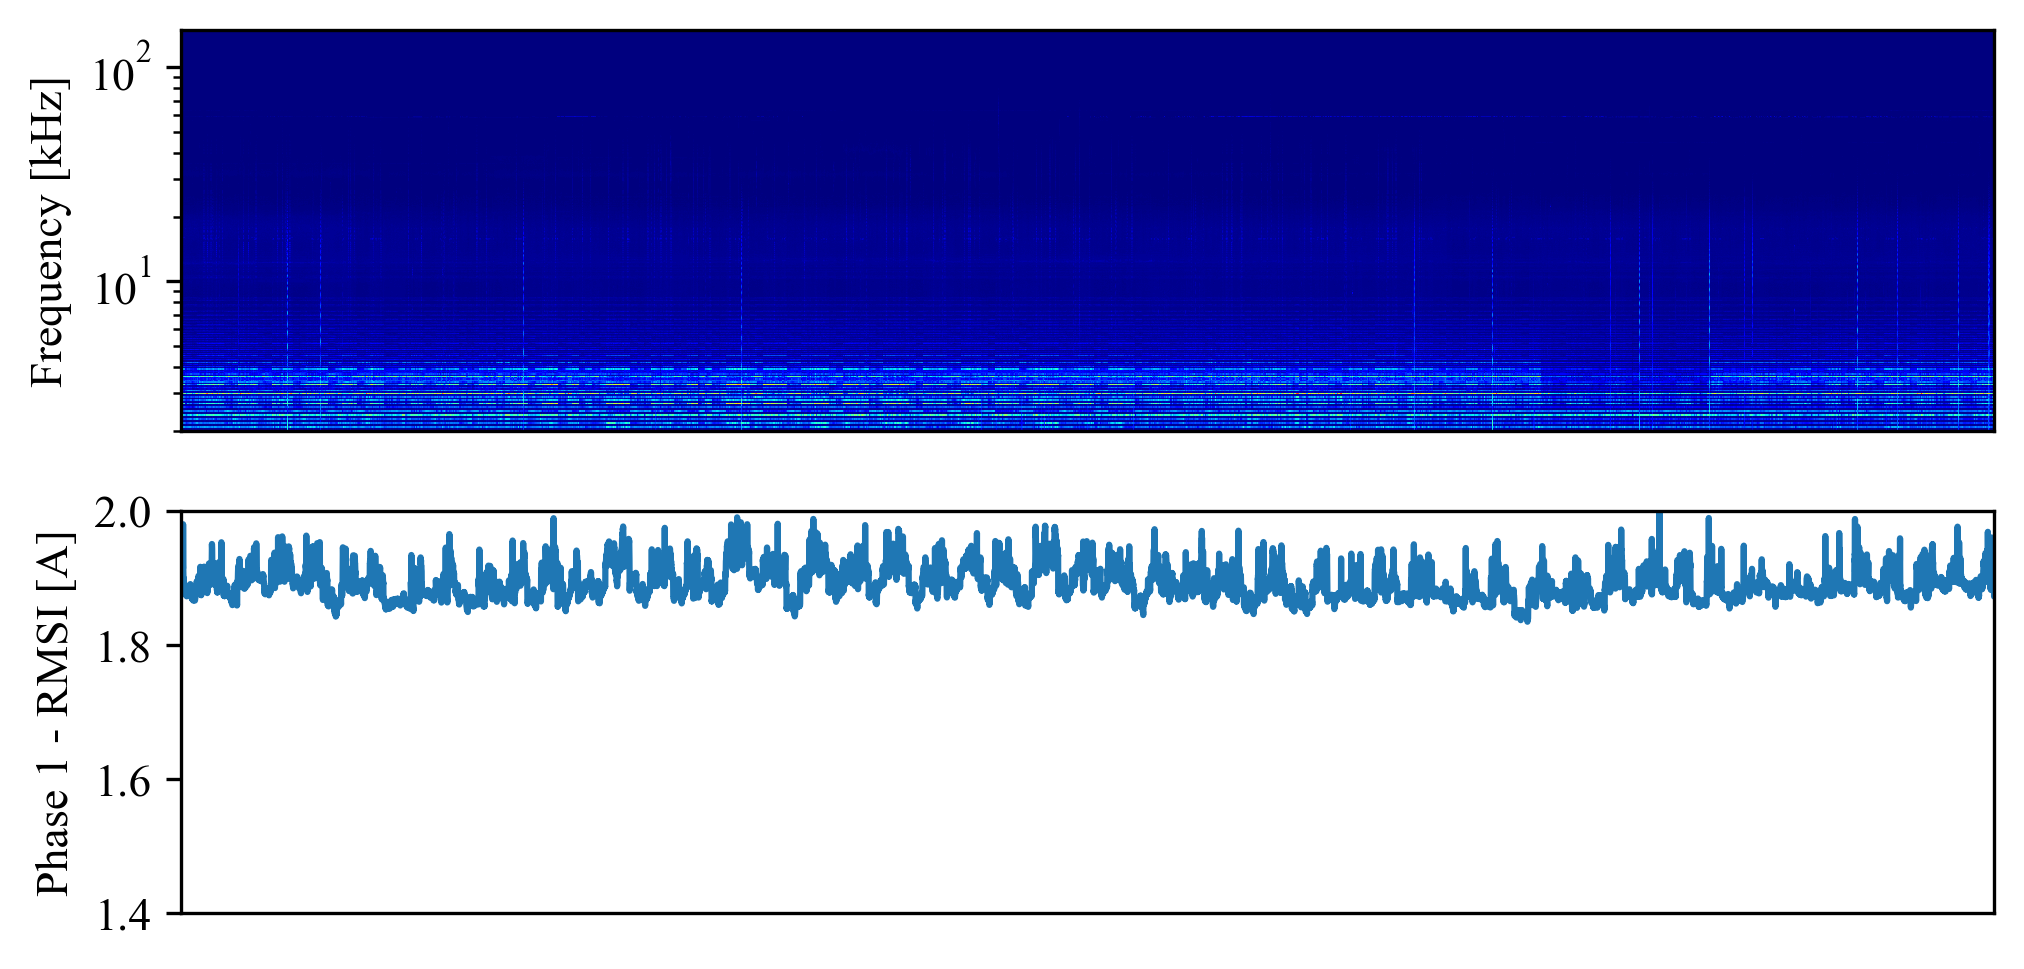

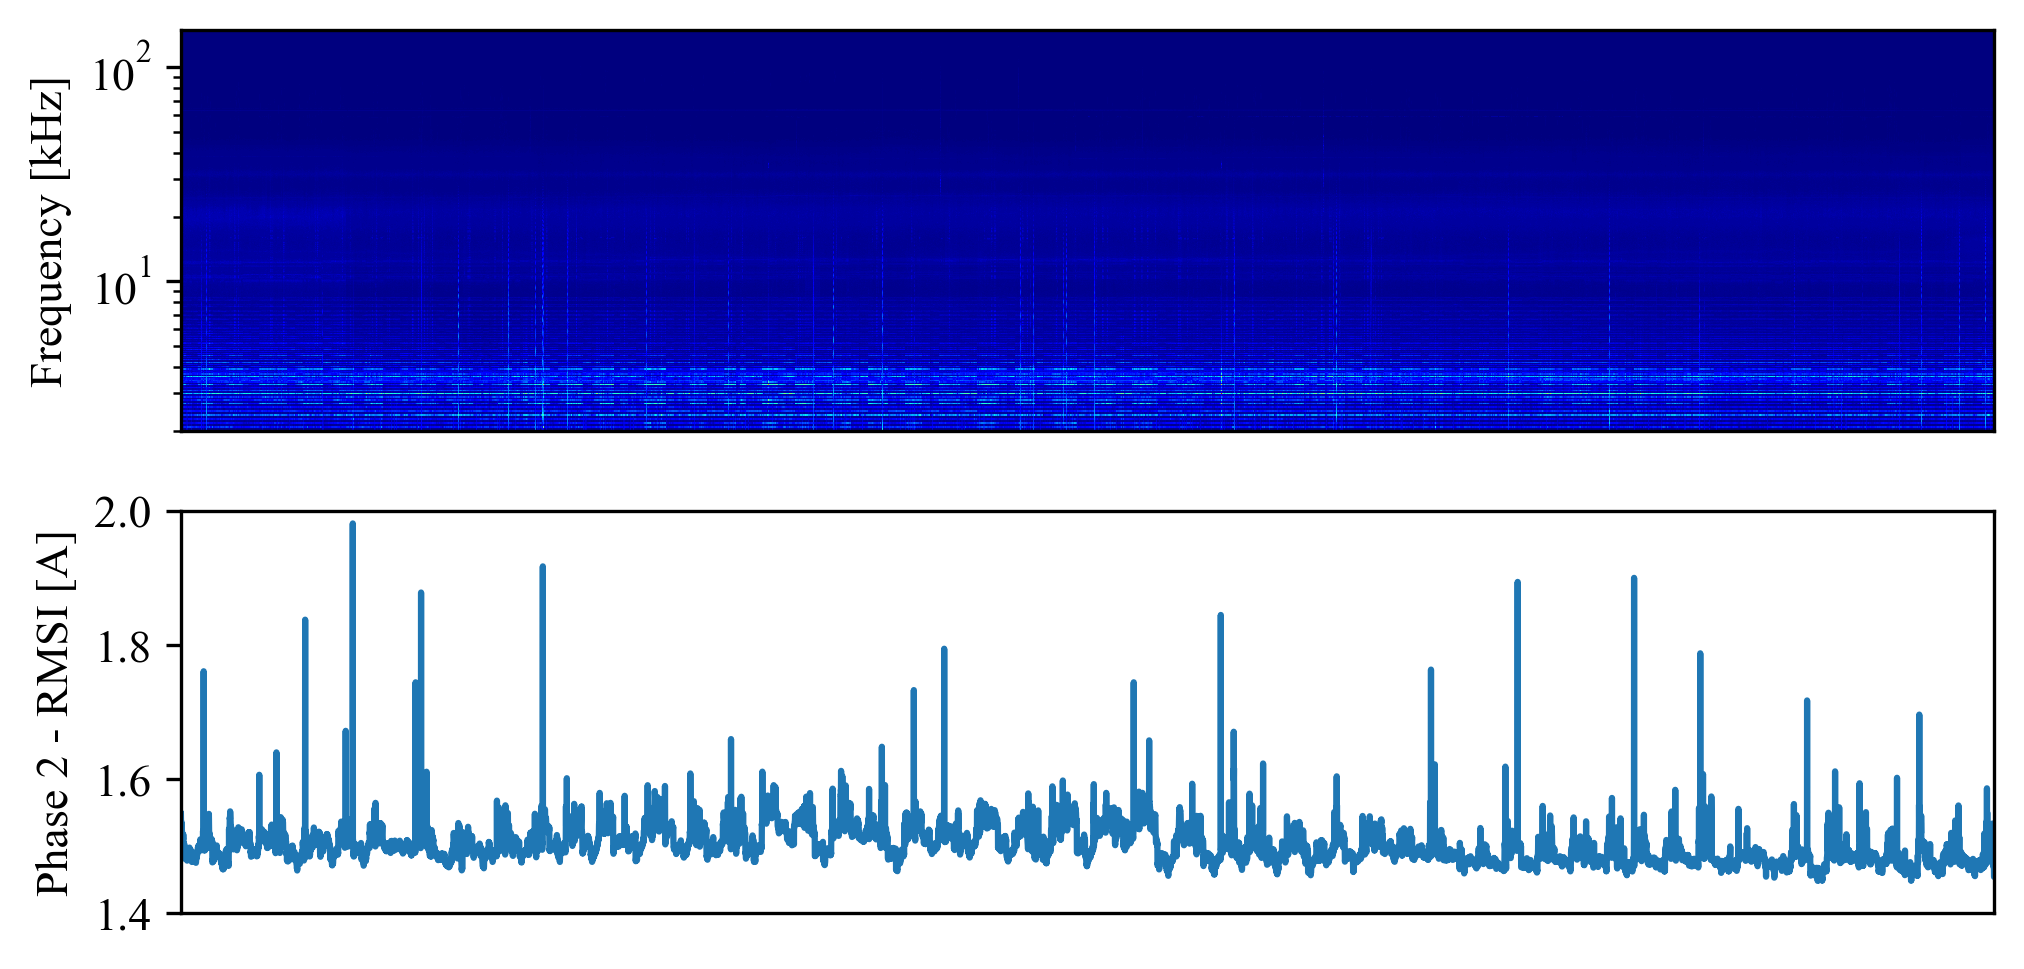

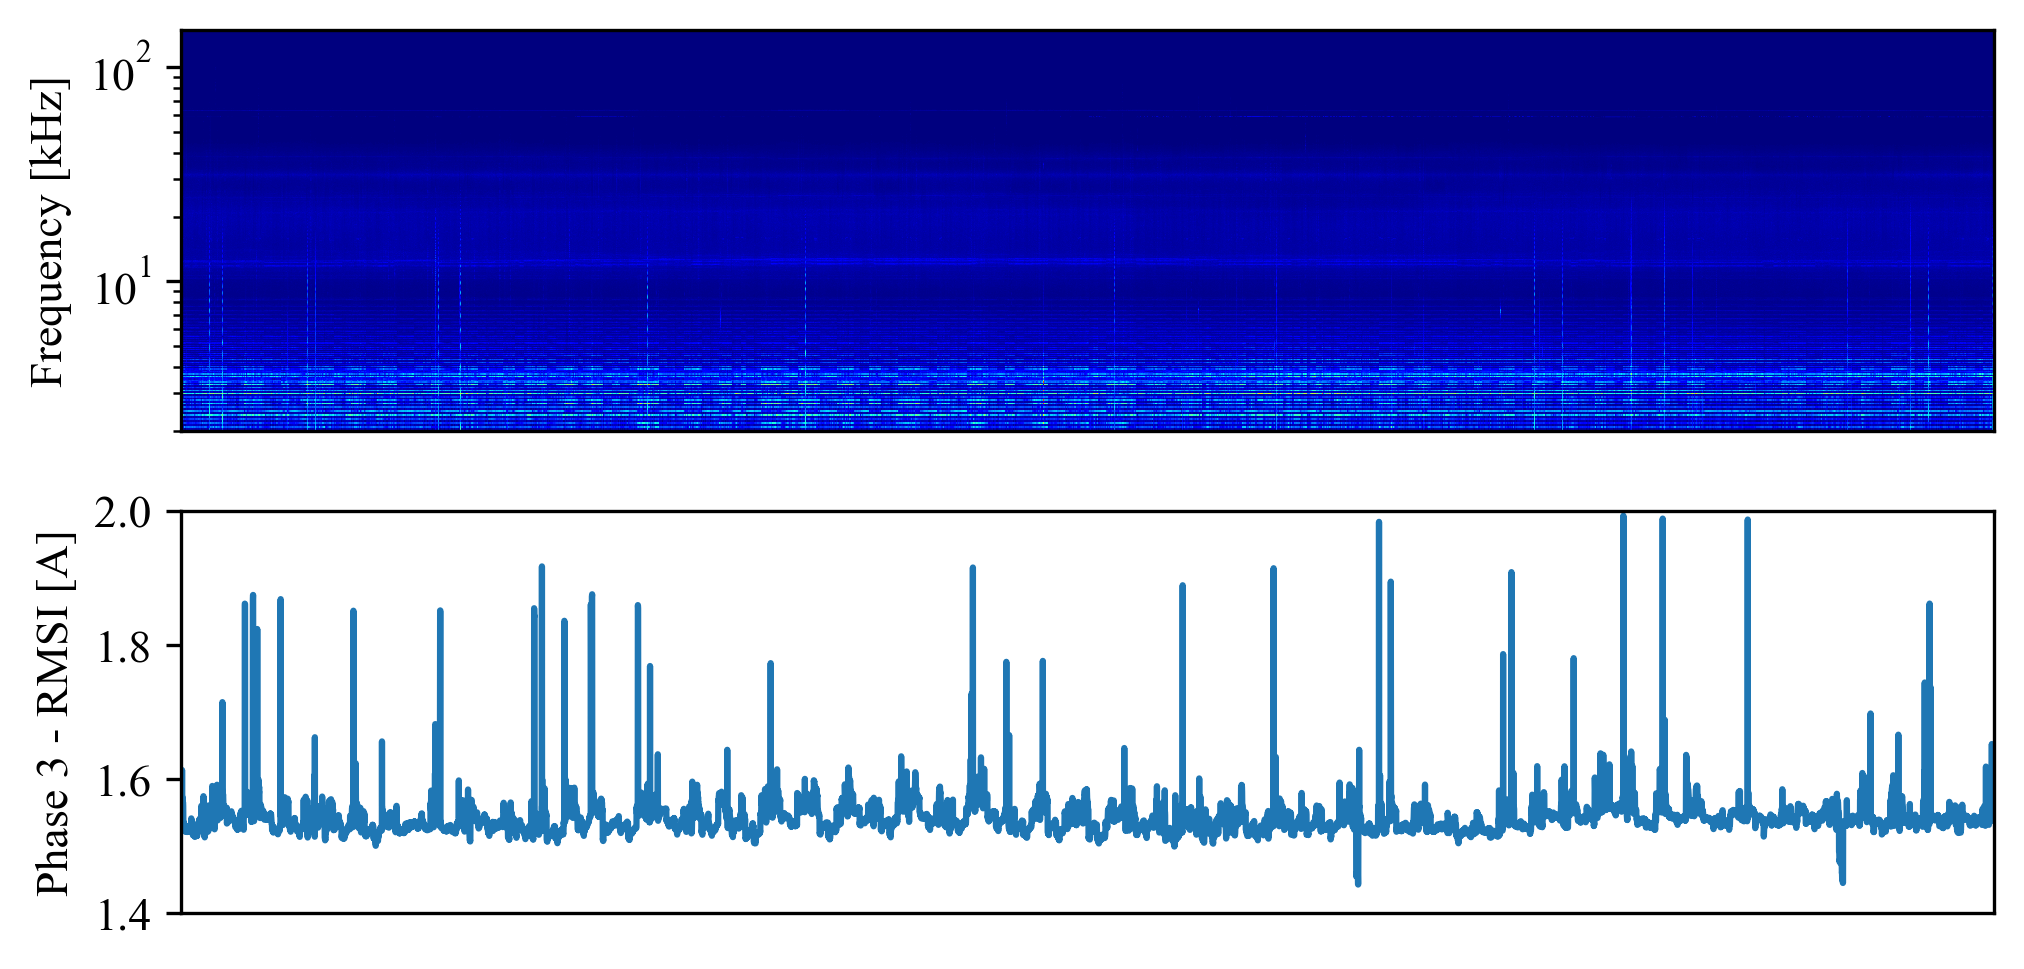

In [20]:
fig, ax = plt.subplots(2)
ax[0].imshow(shi_2A_day_p1.transpose().astype(np.float32), origin='lower', aspect='auto', extent=[0,144,2,150], cmap='jet')
ax[0].set_yscale('log')
ax[0].set_ylabel('Frequency [kHz]')
ax[0].axes.xaxis.set_visible(False)
ax[1].plot(rmsi_2A_day_p1.values)
ax[1].set_ylabel('Phase 1 - RMSI [A]')
ax[1].set_ylim(1.4, 2)
ax[1].set_xlim(0, rmsi_2A_day_p1.shape[0])
ax[1].axes.xaxis.set_visible(False)
#ax[1].xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

fig, ax = plt.subplots(2)
ax[0].imshow(shi_2A_day_p2.transpose().astype(np.float32), origin='lower', aspect='auto', extent=[0,144,2,150], cmap='jet')
ax[0].set_yscale('log')
ax[0].set_ylabel('Frequency [kHz]')
ax[0].axes.xaxis.set_visible(False)
ax[1].plot(rmsi_2A_day_p2.values)
ax[1].set_ylabel('Phase 2 - RMSI [A]')
ax[1].set_ylim(1.4, 2)
ax[1].set_xlim(0, rmsi_2A_day_p2.shape[0])
ax[1].axes.xaxis.set_visible(False)
#ax[1].xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

fig, ax = plt.subplots(2)
ax[0].imshow(shi_2A_day_p3.transpose().astype(np.float32), origin='lower', aspect='auto', extent=[0,144,2,150], cmap='jet')
ax[0].set_yscale('log')
ax[0].set_ylabel('Frequency [kHz]')
ax[0].axes.xaxis.set_visible(False)
ax[1].plot(rmsi_2A_day_p3.values)
ax[1].set_ylabel('Phase 3 - RMSI [A]')
ax[1].set_ylim(1.4, 2)
ax[1].set_xlim(0, rmsi_2A_day_p3.shape[0])
ax[1].axes.xaxis.set_visible(False)
#ax[1].xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

### 18:00 - 6:00

In [21]:
datelist = pd.date_range(start="2017-03-02", end="2018-02-17").strftime("%Y-%m-%d").astype(str).to_list()
#datelist = pd.date_range(start="2017-03-02", end="2017-04-30").strftime("%Y-%m-%d").astype(str).to_list()

#datelist = ["2017-03-02"]

In [22]:
rmsi_all_p1 = pd.DataFrame()
shi_all_p1 = pd.DataFrame()
rmsi_all_p2 = pd.DataFrame()
shi_all_p2 = pd.DataFrame()
rmsi_all_p3 = pd.DataFrame()
shi_all_p3 = pd.DataFrame()

for date in datelist:
    rmsi_all_p1 = rmsi_all_p1.append(pd.read_pickle("E:\\resampled_phasevise\\rmsi\\" + date + "_rmsi_10min_mean_p1.p"))
    shi_all_p1 = shi_all_p1.append(pd.read_pickle("E:\\resampled_phasevise\\i\\" + date + "_harmonics10min_i_max_p1.p"))
    
    rmsi_all_p2 = rmsi_all_p2.append(pd.read_pickle("E:\\resampled_phasevise\\rmsi\\" + date + "_rmsi_10min_mean_p2.p"))
    shi_all_p2 = shi_all_p2.append(pd.read_pickle("E:\\resampled_phasevise\\i\\" + date + "_harmonics10min_i_max_p2.p"))
    
    rmsi_all_p3 = rmsi_all_p3.append(pd.read_pickle("E:\\resampled_phasevise\\rmsi\\" + date + "_rmsi_10min_mean_p3.p"))
    shi_all_p3 = shi_all_p3.append(pd.read_pickle("E:\\resampled_phasevise\\i\\" + date + "_harmonics10min_i_max_p3.p"))

In [23]:
mask = rmsi_all_p1<2
shi_2A_p1 = shi_all_p1.loc[mask[0]]

mask2 = rmsi_all_p2<2
shi_2A_p2 = shi_all_p2.loc[mask2[0]]

mask3 = rmsi_all_p3<2
shi_2A_p3 = shi_all_p3.loc[mask3[0]]

rmsi_2A_p1 = rmsi_all_p1.loc[mask[0]]
rmsi_2A_p2 = rmsi_all_p2.loc[mask2[0]]
rmsi_2A_p3 = rmsi_all_p3.loc[mask3[0]]

In [24]:
shi_2A_night_p1 = shi_2A_p1[(shi_2A_p1.index.hour < 6) | (shi_2A_p1.index.hour > 18)]
shi_2A_night_p2 = shi_2A_p2[(shi_2A_p2.index.hour < 6) | (shi_2A_p2.index.hour > 18)]
shi_2A_night_p3 = shi_2A_p3[(shi_2A_p3.index.hour < 6) | (shi_2A_p3.index.hour > 18)]

rmsi_2A_night_p1 = rmsi_2A_p1[(rmsi_2A_p1.index.hour < 6) | (rmsi_2A_p1.index.hour > 18)]
rmsi_2A_night_p2 = rmsi_2A_p2[(rmsi_2A_p2.index.hour < 6) | (rmsi_2A_p2.index.hour > 18)]
rmsi_2A_night_p3 = rmsi_2A_p3[(rmsi_2A_p3.index.hour < 6) | (rmsi_2A_p3.index.hour > 18)]

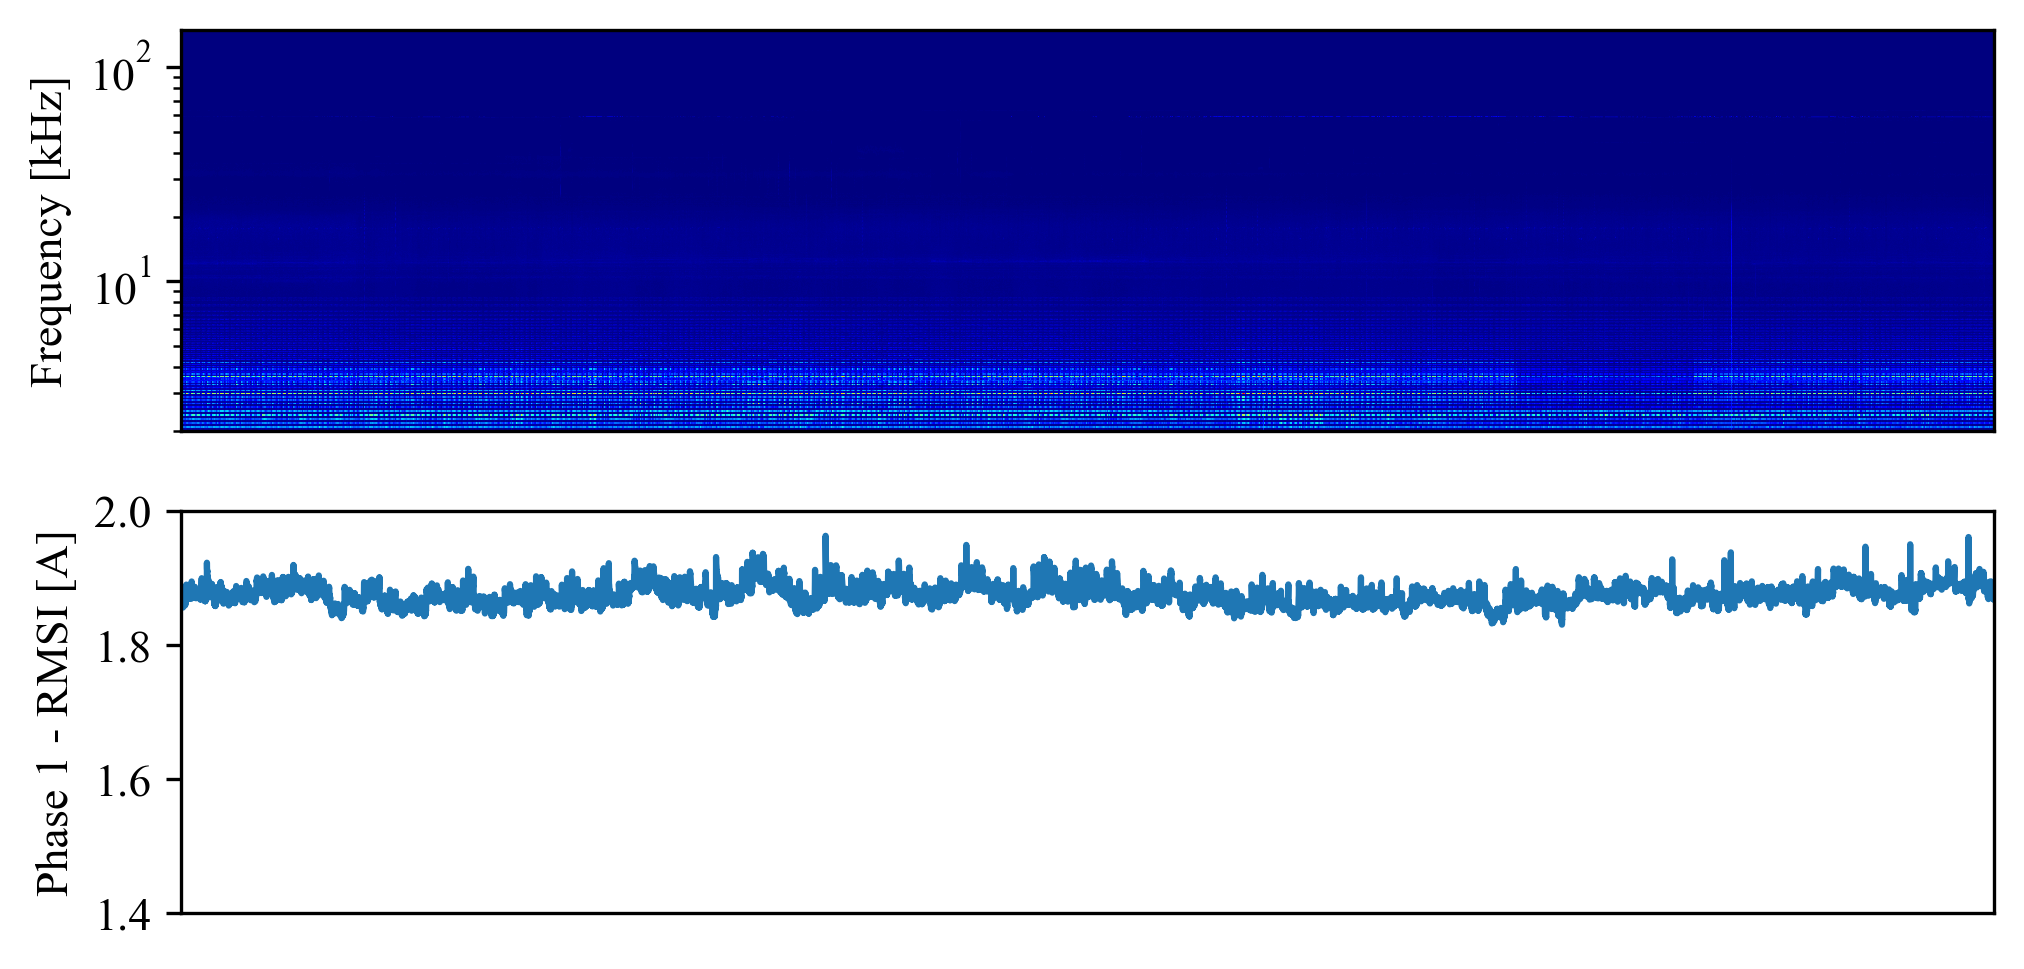

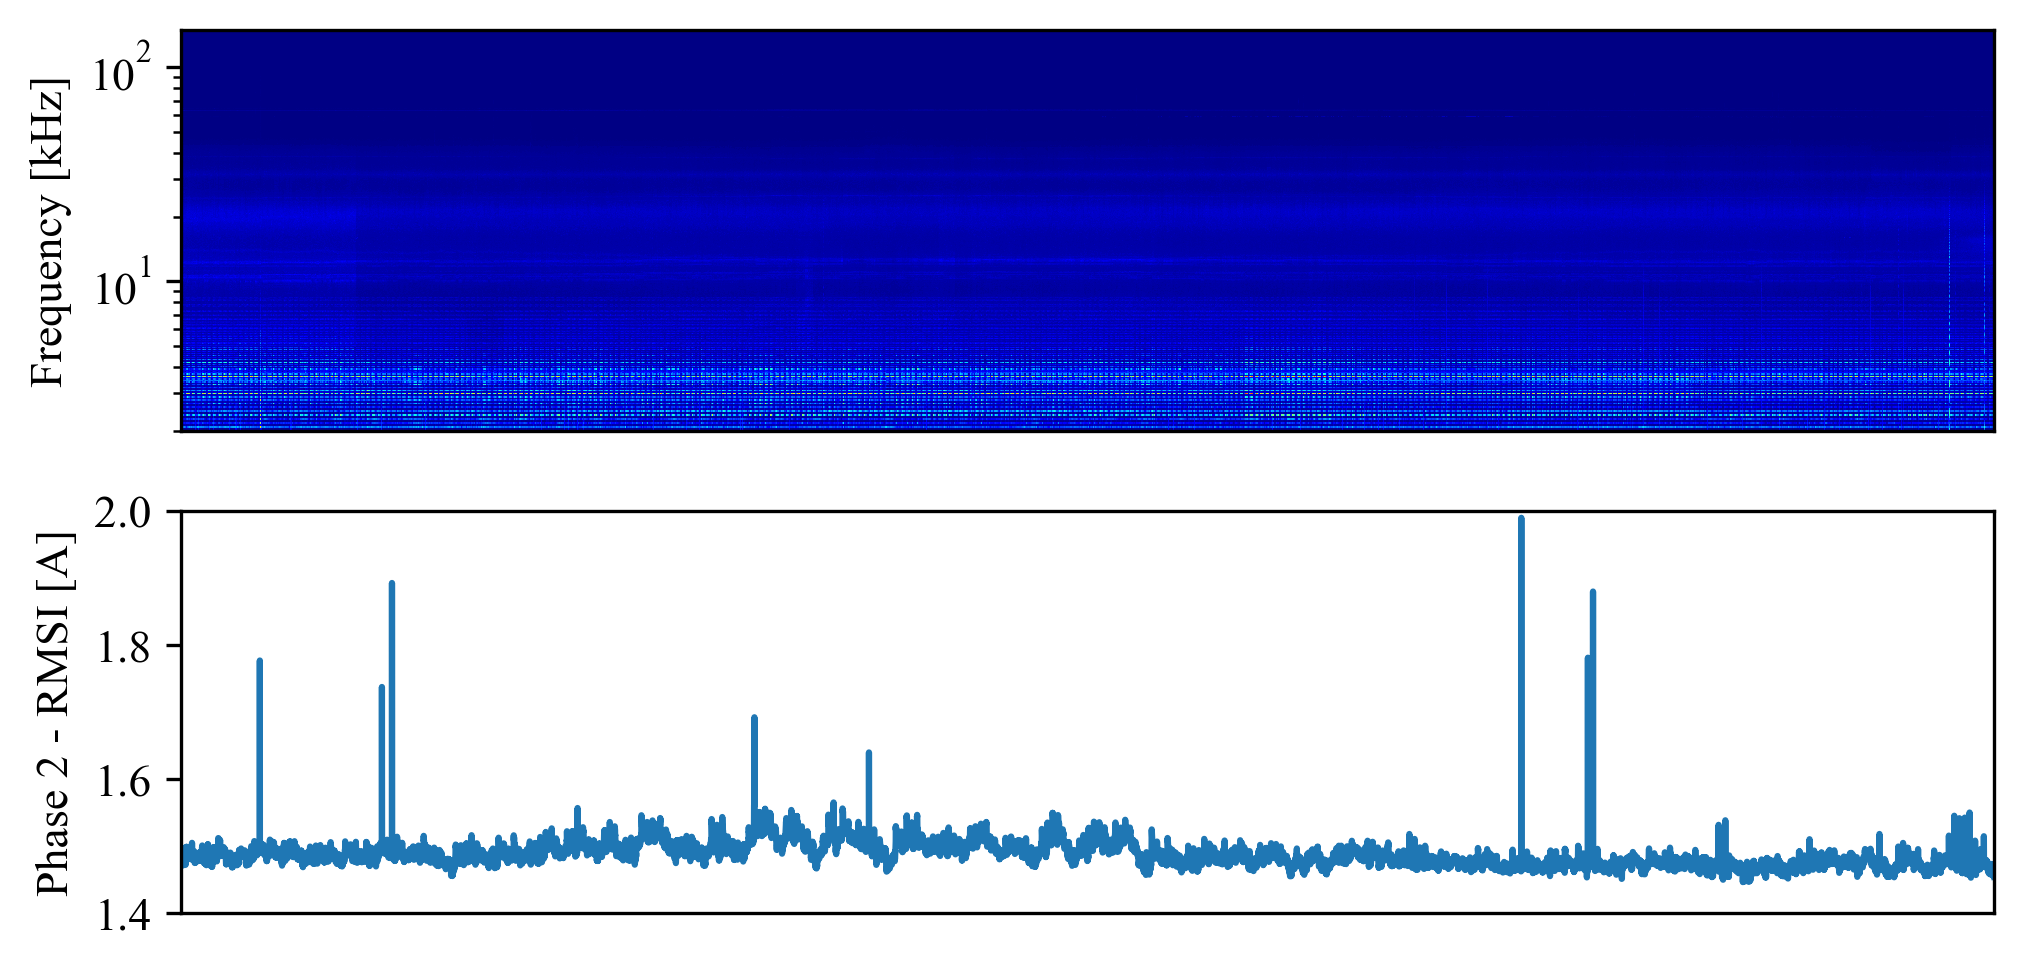

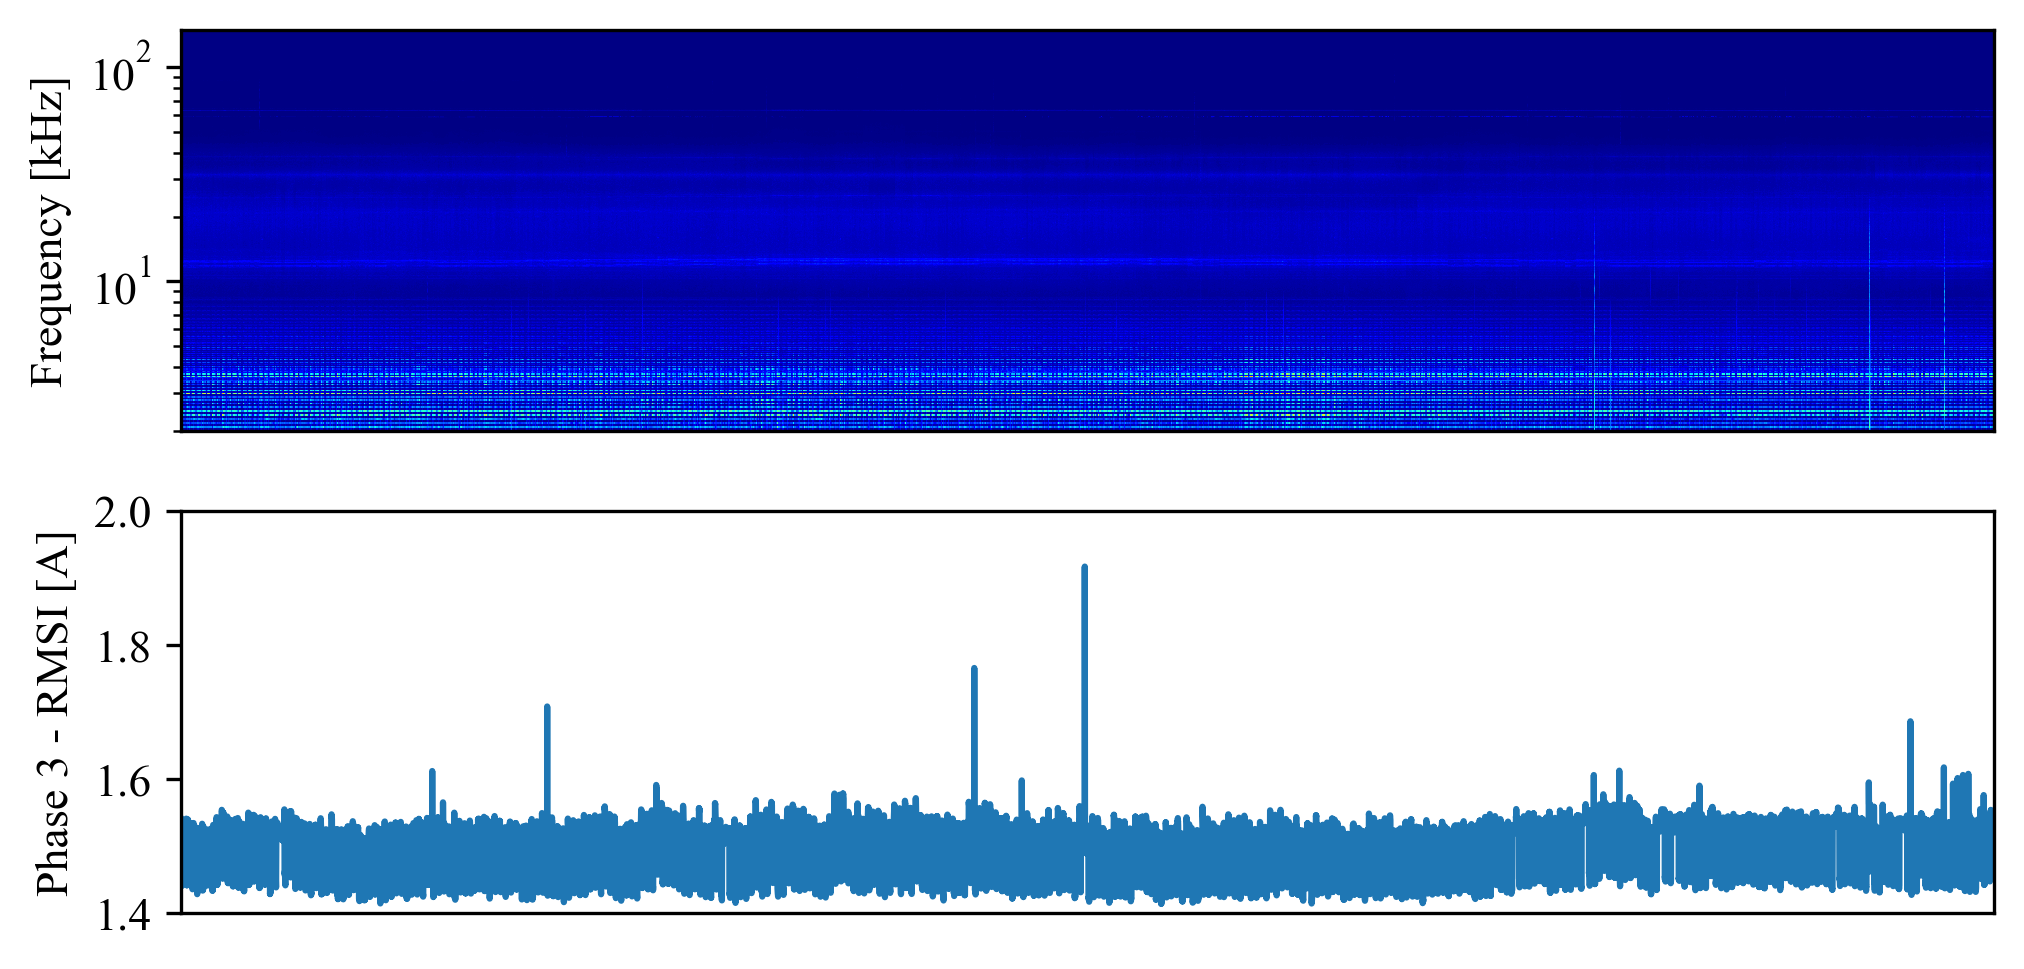

In [25]:
fig, ax = plt.subplots(2)
ax[0].imshow(shi_2A_night_p1.transpose().astype(np.float32), origin='lower', aspect='auto', extent=[0,144,2,150], cmap='jet')
ax[0].set_yscale('log')
ax[0].set_ylabel('Frequency [kHz]')
ax[0].axes.xaxis.set_visible(False)
ax[1].plot(rmsi_2A_night_p1.values)
ax[1].set_ylabel('Phase 1 - RMSI [A]')
ax[1].set_ylim(1.4, 2)
ax[1].set_xlim(0, rmsi_2A_night_p1.shape[0])
ax[1].axes.xaxis.set_visible(False)
#ax[1].xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

fig, ax = plt.subplots(2)
ax[0].imshow(shi_2A_night_p2.transpose().astype(np.float32), origin='lower', aspect='auto', extent=[0,144,2,150], cmap='jet')
ax[0].set_yscale('log')
ax[0].set_ylabel('Frequency [kHz]')
ax[0].axes.xaxis.set_visible(False)
ax[1].plot(rmsi_2A_night_p2.values)
ax[1].set_ylabel('Phase 2 - RMSI [A]')
ax[1].set_ylim(1.4, 2)
ax[1].set_xlim(0, rmsi_2A_night_p2.shape[0])
ax[1].axes.xaxis.set_visible(False)
#ax[1].xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

fig, ax = plt.subplots(2)
ax[0].imshow(shi_2A_night_p3.transpose().astype(np.float32), origin='lower', aspect='auto', extent=[0,144,2,150], cmap='jet')
ax[0].set_yscale('log')
ax[0].set_ylabel('Frequency [kHz]')
ax[0].axes.xaxis.set_visible(False)
ax[1].plot(rmsi_2A_night_p3.values)
ax[1].set_ylabel('Phase 3 - RMSI [A]')
ax[1].set_ylim(1.4, 2)
ax[1].set_xlim(0, rmsi_2A_night_p3.shape[0])
ax[1].axes.xaxis.set_visible(False)
#ax[1].xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))